In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [13]:
df_teachers = pd.read_csv("public FQV_V_list_of_teachers.csv", sep="~")
df_discipline = pd.read_csv("public FQV_V_list_of_discipline.csv", sep="~")
df_oup = pd.read_csv("public FQV_V_list_of_OUP.csv", sep="~")

Давайте попробуем посмотерть по годам посещаемость каждой дисциплины:

У нас все дисциплины уникальные!!! Их 17972.

In [48]:
df_oup

,ID,ProposalItem,PlanClass_D,EdLevel_D,ItemCourse_D,ItemLearnYear_D,StudCount,StudLearnCount,BachStudCount,MagStudCount,RegDepartment_D,Faculty_D,LearnProgram_D
0,2841075702,2.865810e+09,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,30.0,33.0,33,0,Москва,факультет креативных индустрий,Медиакоммуникации
1,2841080394,2.865811e+09,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,30.0,30.0,30,0,Москва,факультет креативных индустрий,Медиакоммуникации
2,2841083512,2.865812e+09,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,30.0,29.0,29,0,Москва,факультет креативных индустрий,Медиакоммуникации
3,2841086181,2.865812e+09,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,30.0,31.0,31,0,Москва,факультет креативных индустрий,Медиакоммуникации
4,2841143136,2.865844e+09,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,30.0,30.0,30,0,Москва,факультет креативных индустрий,Медиакоммуникации
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20868,4502475287,4.466805e+09,Объединенный учебный план,Магистратура,Магистратура 1 курс,2021/2022 учебный год,20.0,7.0,0,7,Москва,факультет экономических наук,Экономика и экономическая политика
20869,4504446723,4.449157e+09,Объединенный учебный план,Магистратура,Магистратура 1 курс,2021/2022 учебный год,20.0,29.0,0,29,Москва,факультет экономических наук,Экономика и экономическая политика
20870,4504447639,4.449156e+09,Объединенный учебный план,Магистратура,Магистратура 1 курс,2021/2022 учебный год,20.0,20.0,0,20,Москва,факультет экономических наук,Экономика и экономическая политика
20871,4505861343,4.505861e+09,Объединенный учебный план,Магистратура,Магистратура 1 курс,2021/2022 учебный год,20.0,1.0,0,1,Москва,факультет экономических наук,Экономика и экономическая политика


Мысль - пойти на https://www.hse.ru/edu/courses и добавить от туда язык чтения курса.

In [11]:
dd = df_oup.groupby(by=df_oup["ProposalItem"]).count()[["ID"]]

In [12]:
dd[dd["ID"] > 2]

,ID
ProposalItem,
1.685416e+09,9
1.685424e+09,9
1.723905e+09,7
1.723905e+09,7
2.011643e+09,6
...,...
4.560319e+09,4
4.560319e+09,4
5.134880e+09,3


Есть дисциплины, для которых не обозначено ожидаемое число студентов (StudCount)

df_oup[df_oup["StudCount"] == "None"]

Думаем, что с ними делать:

Хотим сделать df_oup["StudCount"].astype("int")

In [51]:
df_oup[(df_oup["StudCount"].isna())]

,ID,ProposalItem,PlanClass_D,EdLevel_D,ItemCourse_D,ItemLearnYear_D,StudCount,StudLearnCount,BachStudCount,MagStudCount,RegDepartment_D,Faculty_D,LearnProgram_D
460,1434158830,1.521713e+09,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,NaN,16.0,16,0,Москва,Международный центр подготовки кадров в област...,Управление логистикой и цепями поставок
461,1434158852,1.521713e+09,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,NaN,16.0,16,0,Москва,Международный центр подготовки кадров в област...,Управление логистикой и цепями поставок
462,1434158864,1.521713e+09,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,NaN,16.0,16,0,Москва,Международный центр подготовки кадров в област...,Управление логистикой и цепями поставок
463,1434158875,1.521713e+09,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,NaN,16.0,16,0,Москва,Международный центр подготовки кадров в област...,Управление логистикой и цепями поставок
502,1506494153,1.521712e+09,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,NaN,10.0,10,0,Москва,Международный центр подготовки кадров в област...,Управление логистикой и цепями поставок (з)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19495,6567746669,NaN,Объединенный учебный план,Магистратура,Магистратура 1 курс,2020/2021 учебный год,NaN,4.0,0,4,Москва,Институт образования,Управление образованием
19496,6567747027,NaN,Объединенный учебный план,Магистратура,Магистратура 1 курс,2020/2021 учебный год,NaN,4.0,0,4,Москва,Институт образования,Управление образованием
19497,6565202616,6.542850e+09,Объединенный учебный план,Магистратура,Магистратура 1 курс,2020/2021 учебный год,NaN,5.0,0,5,Москва,Институт образования,Управление образованием
19498,6565203399,6.542850e+09,Объединенный учебный план,Магистратура,Магистратура 1 курс,2020/2021 учебный год,NaN,3.0,0,3,Москва,Институт образования,Управление образованием


In [5]:
plt.figure(figsize=(5, 5))
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
a = df_oup[(df_oup["StudCount"].isna()) & (df_oup["StudLearnCount"] != "None")]["StudLearnCount"]
# labels = df_oup[df_oup["StudCount"] == "None"]["StudLearnCount"].unique()
# labels = np.sort(labels)
plt.hist(list(map(int, a)), bins=20)
plt.show()
# labels

NameError: name 'df_oup' is not defined

<Figure size 500x500 with 0 Axes>

In [8]:
# set(df_discipline["Description"].unique())

План, как над этим работать:

1) Изучить таблицы, немного понять физику всего этого
2) Сделать гипотезы, какие факторы влияют на посещаемость курса
3) Проверить их
4) Дальше повторяем шаги 2-3, стараемся проанализировать все параметры

Гарри Поттер бы сказал, что план плохой, но пока сойдет.

В итоге будет два вида курсов - те, которые раньше встречались, и раньше не встречались. Для первых мы хотим проанализировать предыдущие года, количество мест и заполняемость, чтобы построить прогноз. Для второй группы, мы хотим как-то оценить востребованность курса.

Идейно мы также хотим выделить основные факторы, влияющие на успешность курса.

Из того, что может также понадобиться, но чего нет в данных:

* язык курса (это точно можно получить с сайта https://www.hse.ru/edu/courses/)
* оценки (непонятно, можно ли это получить вообще).

Теперь перейдем к тому, что в данных есть, и как мы собрались это анализировать. 

В качестве показателя хорошести будем считать разницу StudLearnCount и StudCount. В идеале этот параметр должен быть около нуля. Если он большой, значит надо бы увеличить количетсво мест на курсе, если маленький - уменьшить или вообще закрыть.

Теперь непосредственно о модели. В качестве метрики возьмем то, что написано выше + как-то модифицируем. Осталось разобраться, как собственно построить модель.

Начнем работу с простой линейной регрессии. 

Сначала разберемся, что делать с одинаковыми курсами. Или построить первую модель без них, чисто на признаки посмотреть?

In [14]:
df_oup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20873 entries, 0 to 20872
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               20873 non-null  int64  
 1   ProposalItem     20419 non-null  float64
 2   PlanClass_D      20873 non-null  object 
 3   EdLevel_D        19124 non-null  object 
 4   ItemCourse_D     16530 non-null  object 
 5   ItemLearnYear_D  20873 non-null  object 
 6   StudCount        19805 non-null  float64
 7   StudLearnCount   20135 non-null  float64
 8   BachStudCount    20873 non-null  int64  
 9   MagStudCount     20873 non-null  int64  
 10  RegDepartment_D  19275 non-null  object 
 11  Faculty_D        19275 non-null  object 
 12  LearnProgram_D   17280 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 2.1+ MB


In [21]:
df_oup["ID"].astype('int')

0        2841075702
1        2841080394
2        2841083512
3        2841086181
4        2841143136
            ...    
20868    4502475287
20869    4504446723
20870    4504447639
20871    4505861343
20872    4505861347
Name: ID, Length: 20873, dtype: int64

In [22]:
df_oup.nunique()

ID                 20873
ProposalItem       17972
PlanClass_D            5
EdLevel_D              4
ItemCourse_D          10
ItemLearnYear_D        3
StudCount            271
StudLearnCount       375
BachStudCount        372
MagStudCount         127
RegDepartment_D        4
Faculty_D             52
LearnProgram_D       316
dtype: int64

In [12]:
dd = df_oup.groupby(by=["ProposalItem", "ItemLearnYear_D"]).count()[["ID"]]
dd[dd["ID"] > 2]

,,ID
ProposalItem,ItemLearnYear_D,
1685415853,2019/2020 учебный год,9
1685423790,2020/2021 учебный год,9
1723905205,2019/2020 учебный год,7
1723905213,2020/2021 учебный год,7
2011643261,2019/2020 учебный год,6
...,...,...
5253642953,2021/2022 учебный год,6
5375583325,2021/2022 учебный год,6
None,2019/2020 учебный год,164


In [13]:
df_discipline.nunique()

Description           7500
LongName              7502
SubjectClass_D           2
FacDepartment_D        215
FDFaculty_D             53
FDRegDepartment_D        4
ID                   17972
MasterItem           17276
MasterItemPos        17208
ItemSource_D             4
AudienceScope_D          4
Credits                 25
EntireHours             31
LectionHours            60
SeminarHours            75
PracticeHours          115
PeriodNumList           18
WithOnlineCourse         2
ItemLearnYear_D          3
dtype: int64

# Преобразование значений!

In [15]:
df_oup = df_oup.drop(df_oup[df_oup["StudCount"] == "None"].index)

In [16]:
df_oup = df_oup.drop(df_oup[df_oup["StudLearnCount"] == "None"].index)

In [17]:
df_oup = df_oup.drop(df_oup[df_oup["ProposalItem"] == "None"].index)

In [18]:
df_oup = df_oup.dropna(subset=["StudCount", "StudLearnCount", "ProposalItem"])

Хотим заменить в столбце "Credits" все значения None на 0 (это и правда дисциплины без веса):

In [19]:
df_discipline.loc[df_discipline["Credits"] == "None", "Credits"] = 0
df_discipline.loc[df_discipline["LectionHours"] == "None", "LectionHours"] = 0
df_discipline.loc[df_discipline["SeminarHours"] == "None", "SeminarHours"] = 0
df_discipline.loc[df_discipline["PracticeHours"] == "None", "PracticeHours"] = 0
df_discipline.loc[df_discipline["EntireHours"] == "None", "EntireHours"] = 0

In [20]:
df_discipline.loc[df_discipline["Credits"].isna(), "Credits"] = 0
df_discipline.loc[df_discipline["LectionHours"].isna(), "LectionHours"] = 0
df_discipline.loc[df_discipline["SeminarHours"].isna(), "SeminarHours"] = 0
df_discipline.loc[df_discipline["PracticeHours"].isna(), "PracticeHours"] = 0
df_discipline.loc[df_discipline["EntireHours"].isna(), "EntireHours"] = 0

In [21]:
df_oup = df_oup.astype({"StudCount": 'int',
                        "StudLearnCount": 'int', 
                        "ProposalItem": 'int'})
df_discipline = df_discipline.astype({"Credits": 'int',
                                      "LectionHours": 'int',
                                      "SeminarHours": 'int',
                                      "PracticeHours": 'int',
                                      "EntireHours": 'int'})
# df_teachers = df_teachers.astype({"CustomPlanItem": 'int'})

In [22]:
df = df_oup.join(df_discipline.set_index("ID"), on="ProposalItem",  rsuffix='_discipline')
df

,ID,ProposalItem,PlanClass_D,EdLevel_D,ItemCourse_D,ItemLearnYear_D,StudCount,StudLearnCount,BachStudCount,MagStudCount,...,ItemSource_D,AudienceScope_D,Credits,EntireHours,LectionHours,SeminarHours,PracticeHours,PeriodNumList,WithOnlineCourse,ItemLearnYear_D_discipline
0,2841075702,2865810374,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,30,33,33,0,...,Средства университета,NaN,3,114,18,20,0,1,Нет,2019/2020 учебный год
1,2841080394,2865810719,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,30,30,30,0,...,Средства университета,NaN,3,114,18,20,0,1,Нет,2019/2020 учебный год
2,2841083512,2865811719,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,30,29,29,0,...,Средства университета,NaN,3,114,18,20,0,1,Нет,2019/2020 учебный год
3,2841086181,2865811996,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,30,31,31,0,...,Средства университета,NaN,3,114,18,20,0,1,Нет,2019/2020 учебный год
4,2841143136,2865843661,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,30,30,30,0,...,Средства университета,NaN,3,114,18,20,0,3,Нет,2019/2020 учебный год
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20868,4502475287,4466805473,Объединенный учебный план,Магистратура,Магистратура 1 курс,2021/2022 учебный год,20,7,0,7,...,Средства университета,для своего кампуса,6,228,38,38,0,"3, 4",Нет,2021/2022 учебный год
20869,4504446723,4449156989,Объединенный учебный план,Магистратура,Магистратура 1 курс,2021/2022 учебный год,20,29,0,29,...,Средства университета,для своего кампуса,6,228,60,30,0,"1, 2",Нет,2021/2022 учебный год
20870,4504447639,4449156466,Объединенный учебный план,Магистратура,Магистратура 1 курс,2021/2022 учебный год,20,20,0,20,...,Средства университета,для своего кампуса,6,228,60,30,0,"1, 2",Нет,2021/2022 учебный год
20871,4505861343,4505861336,Объединенный учебный план,Магистратура,Магистратура 1 курс,2021/2022 учебный год,20,1,0,1,...,Средства университета,для своего кампуса,3,114,20,20,0,3,Нет,2021/2022 учебный год


In [169]:
df = df.drop(columns="ItemLearnYear_D_discipline")

In [46]:
# df = df.join(df_teachers.set_index("CustomPlanItem"), on="ID", rsuffix="_teachers")
# df

# Исправляем ошибки

In [171]:
df.loc[df["PeriodNumList"] == "1, 2, 2", "PeriodNumList"] = "1, 2"

# Делаем проверку на lowercase, чтобы сделать все в нижнем регистре

In [179]:
df = pd.read_csv("oup_discipline.csv")

In [176]:
str_columns = set()
for x in df.columns:
    a = pd.unique(df[x])
    b = set()
    for i in pd.unique(df[x]):
        if isinstance(i, str):
            str_columns.add(x)
            b.add(i.lower())
        else:
            b.add(i)
    if len(a) != len(b):
        print(x)

In [177]:
for x in str_columns:
    df[x] =  df[x].str.lower()

## Загрузка в csv!

In [178]:
df.to_csv("oup_discipline.csv", index=None)

In [168]:
df = pd.read_csv("oup_discipline.csv")

In [22]:
%store df

Stored 'df' (DataFrame)


Давайте попробуем простую линейную регрессию!

## С этого момента все эксперименты выносятся в ноутбук Models, здесь остается только изучение данных.

Давайте попробуем поиспользовать Credits и PracticeHours, но для этого надо решить, что делать с проблеми ("None").
Для Credits проблема решена выше - заменили на 0 (это в основном физкультура, логично, что она не имеет веса).
Предлагаю для PracticeHours и тд тоже заменить на 0 и потестить.

Может разделить курсы на большие и маленькие?

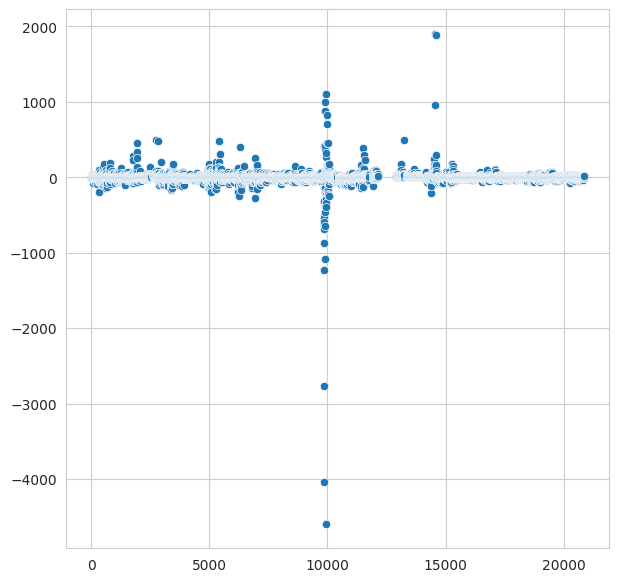

In [23]:
diff = df["StudCount"] - df["StudLearnCount"]
plt.figure(figsize=(7, 7))
sns.scatterplot(diff)
plt.show()

In [24]:
df["Description"]

0        Трансмедийные технологии в создании и продвиже...
1        Цифровые технологии и управление контентом в с...
2                               Телевизионный сторителлинг
3                          Исследование медийных скандалов
4                                Медиа, культура и критика
                               ...                        
20868                               Анализ временных рядов
20869                 Макроэкономика (продвинутый уровень)
20870                 Микроэкономика (продвинутый уровень)
20871                          Экспериментальная экономика
20872                          Экспериментальная экономика
Name: Description, Length: 19147, dtype: object

In [23]:
df[df["StudCount"] - df["StudLearnCount"] < -1000][["Description", "StudCount", "StudLearnCount"]]

,Description,StudCount,StudLearnCount
9853,Английский язык,0,1226
9859,Английский язык,500,4532
9860,Английский язык,400,3171
9915,Английский язык для общих коммуникативных целе...,821,1904
9941,Английский язык,1,4592


Видно, что самые большие дельты у Английского языка(в том или ином виде). Давайте попробуем добавить факультет:

In [373]:
base_regression(["StudCount", "Credits"], ["Description"], no_coef=True)

RMSE:
32.30016017583393 



Давайте посмотрим на scatter Credits от StudCount или что-то подобное.

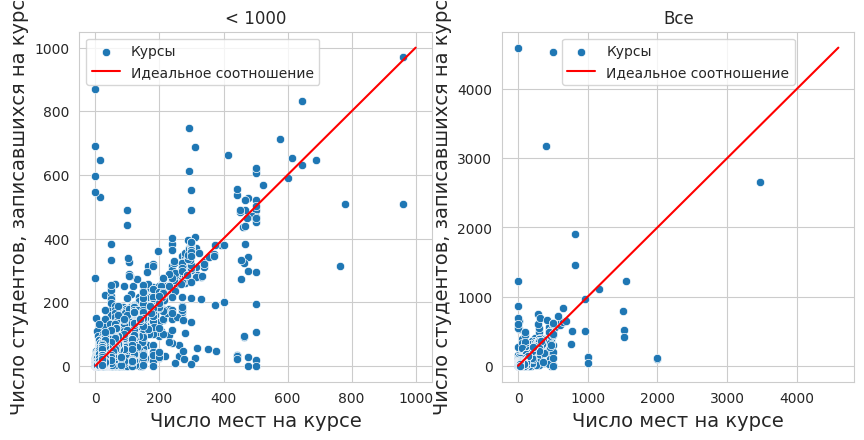

In [25]:
plt.figure(figsize=(10, 10))
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
# plt.set_title("Ожидаемое и реальное число студентов для каждого курса", fontsize=15)

ax1 = plt.subplot(221)
plt.title("< 1000")
cond1 = ((df["StudLearnCount"] < 1000) & (df["StudCount"] < 1000))
sns.scatterplot(data=df[cond1],
                x="StudCount", y="StudLearnCount",label="Курсы")
plt.plot([0, 1000], [0, 1000], color="red", label="Идеальное соотношение")
plt.ylabel("Число студентов, записавшихся на курс", fontsize=14)
plt.xlabel("Число мест на курсе", fontsize=14)
plt.legend()

ax2 = plt.subplot(222)

plt.title("Все")

sns.scatterplot(data=df,
                x="StudCount", y="StudLearnCount", label="Курсы")
plt.plot([0, 4600], [0, 4600], color="red", label="Идеальное соотношение")
# plt.xticks(np.linspace(0, 4600, 8))
# plt.title("Ожидаемое и реальное число студентов для каждого курса", fontsize=15)
plt.ylabel("Число студентов, записавшихся на курс", fontsize=14)
plt.xlabel("Число мест на курсе", fontsize=14)
plt.legend()

plt.show()

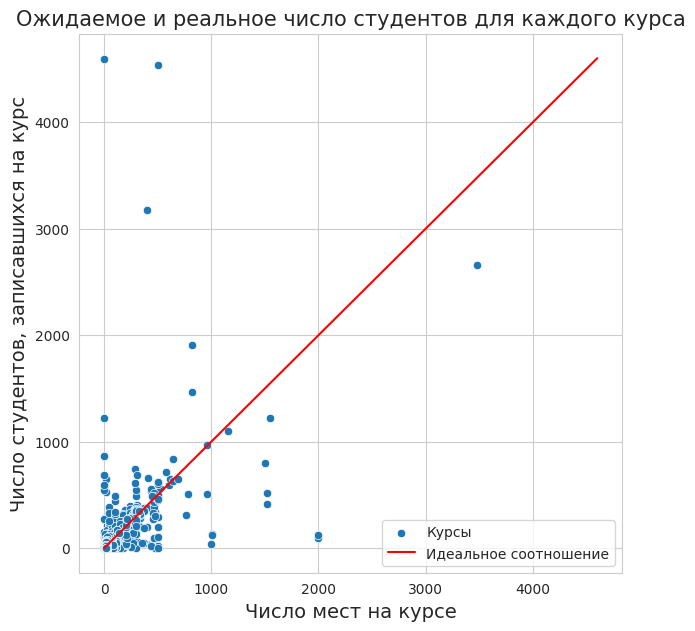

In [26]:
plt.figure(figsize=(7, 7))
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.scatterplot(data=df,
                x="StudCount", y="StudLearnCount", label="Курсы")
plt.plot([0, 4600], [0, 4600], color="red", label="Идеальное соотношение")
plt.title("Ожидаемое и реальное число студентов для каждого курса", fontsize=15)
plt.ylabel("Число студентов, записавшихся на курс", fontsize=14)
plt.xlabel("Число мест на курсе", fontsize=14)
plt.legend()
plt.show()

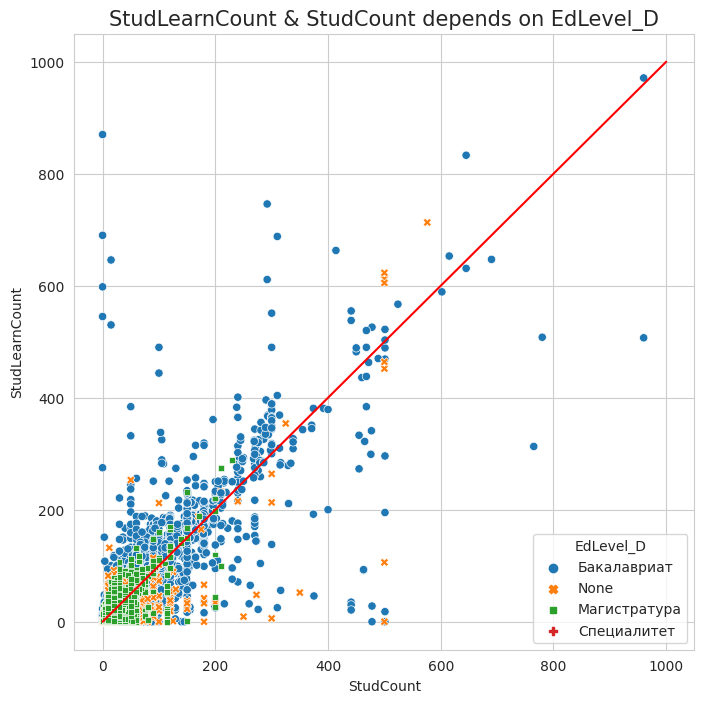

In [27]:
plt.figure(figsize=(8, 8))
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
cond1 = ((df["StudLearnCount"] < 1000) & (df["StudCount"] < 1000))
sns.scatterplot(data=df[cond1],
                x="StudCount", y="StudLearnCount",
               hue="EdLevel_D", style="EdLevel_D")
plt.plot([0, 1000], [0, 1000], color="red")
plt.title("StudLearnCount & StudCount depends on EdLevel_D", fontsize=15)
plt.show()

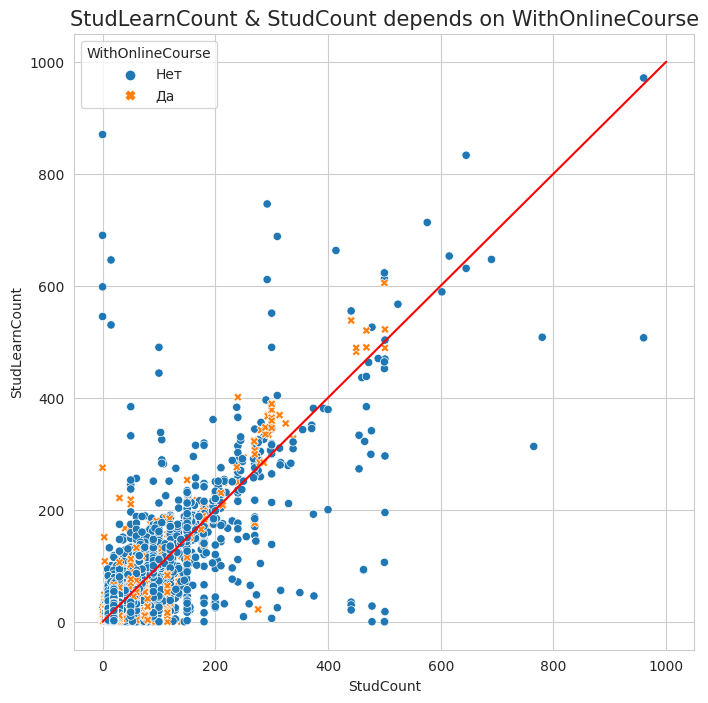

In [28]:
plt.figure(figsize=(8, 8))
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.scatterplot(data=df[(df["StudLearnCount"] < 1000) & (df["StudCount"] < 1000)],
                x="StudCount", y="StudLearnCount",
               hue="WithOnlineCourse", style="WithOnlineCourse")
plt.plot([0, 1000], [0, 1000], color="red")
plt.title("StudLearnCount & StudCount depends on WithOnlineCourse", fontsize=15)
plt.show()

Давайте реализуем разделение на "тяжелые" курсы (т.е. выделим отдельную колонку с 1 если в курсе > 500 мест).

Точнее, просто разобьем на корзины (скажем 5 штук).

In [54]:
df["StudCountBins"] = np.log1p(df["StudCount"])

In [55]:
df = df.astype({"StudCountBins": 'int'})

In [494]:
df

,ID,ProposalItem,PlanClass_D,EdLevel_D,ItemCourse_D,ItemLearnYear_D,StudCount,StudLearnCount,BachStudCount,MagStudCount,...,Credits,EntireHours,LectionHours,SeminarHours,PracticeHours,PeriodNumList,WithOnlineCourse,ItemLearnYear_D_discipline,Diff,StudCountBins
0,2841075702,2865810374,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,30,33,33,0,...,3,114,18,20,0,1,Нет,2019/2020 учебный год,-3,3
1,2841080394,2865810719,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,30,30,30,0,...,3,114,18,20,0,1,Нет,2019/2020 учебный год,0,3
2,2841083512,2865811719,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,30,29,29,0,...,3,114,18,20,0,1,Нет,2019/2020 учебный год,1,3
3,2841086181,2865811996,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,30,31,31,0,...,3,114,18,20,0,1,Нет,2019/2020 учебный год,-1,3
4,2841143136,2865843661,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,30,30,30,0,...,3,114,18,20,0,3,Нет,2019/2020 учебный год,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20868,4502475287,4466805473,Объединенный учебный план,Магистратура,Магистратура 1 курс,2021/2022 учебный год,20,7,0,7,...,6,228,38,38,0,"3, 4",Нет,2021/2022 учебный год,13,3
20869,4504446723,4449156989,Объединенный учебный план,Магистратура,Магистратура 1 курс,2021/2022 учебный год,20,29,0,29,...,6,228,60,30,0,"1, 2",Нет,2021/2022 учебный год,-9,3
20870,4504447639,4449156466,Объединенный учебный план,Магистратура,Магистратура 1 курс,2021/2022 учебный год,20,20,0,20,...,6,228,60,30,0,"1, 2",Нет,2021/2022 учебный год,0,3
20871,4505861343,4505861336,Объединенный учебный план,Магистратура,Магистратура 1 курс,2021/2022 учебный год,20,1,0,1,...,3,114,20,20,0,3,Нет,2021/2022 учебный год,19,3


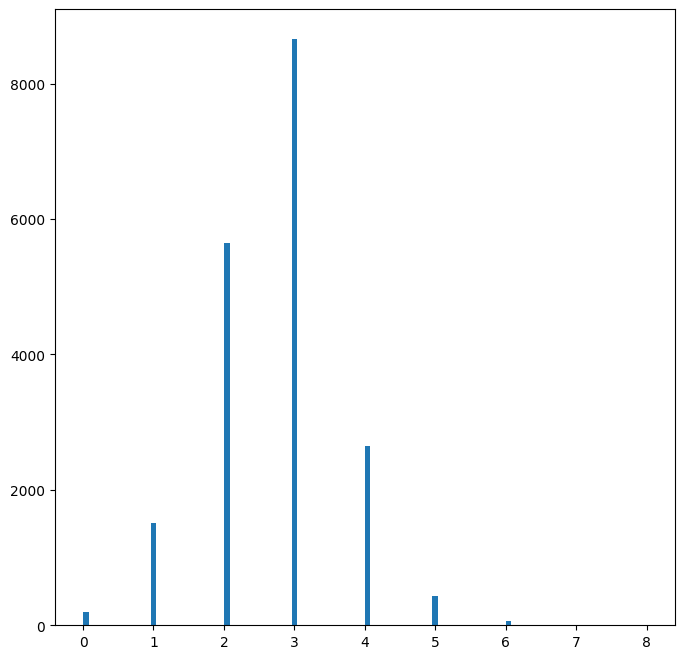

In [495]:
plt.figure(figsize=(8, 8))
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
plt.hist(df["StudCountBins"], bins=100)
# plt.title("StudLearnCount & StudCount depends on WithOnlineCourse", fontsize=15)
plt.show()

In [ ]:
df["CrossStudCount"] = df["StudCount"] * df["StudCountBins"]

Посмотрим на EntireHours:

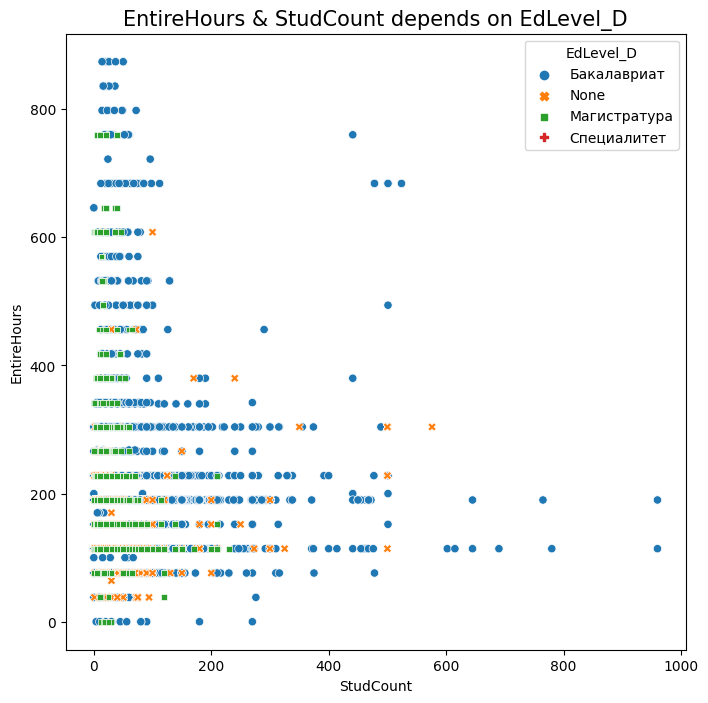

In [515]:
plt.figure(figsize=(8, 8))
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.scatterplot(data=df[(df["StudLearnCount"] < 1000) & (df["StudCount"] < 1000)],
                x="StudCount", y="EntireHours",
               hue="EdLevel_D", style="EdLevel_D")
# plt.plot([0, 1000], [0, 1000], color="red")
plt.title("EntireHours & StudCount depends on EdLevel_D", fontsize=15)
plt.show()

Для доработки:

* Идея - изменить метрику, сделать процент (x / y, где x - прдесказанное, y - истинное).

* Поработать с названиями курсов, наследственностью

* Возможно надо добавить новые парметры

* 


In [50]:
def part_error(y_test, y_pred):
    y_test[y_test == 0] = 1
    return (y_pred / y_test).mean()

Давайте попробуем посмотреть на название курсов:

In [69]:
df[df["Description"] == "Технологии дизайна. Базовый уровень 1"]

,ID,ProposalItem,PlanClass_D,EdLevel_D,ItemCourse_D,ItemLearnYear_D,StudCount,StudLearnCount,BachStudCount,MagStudCount,...,ItemSource_D,AudienceScope_D,Credits,EntireHours,LectionHours,SeminarHours,PracticeHours,PeriodNumList,WithOnlineCourse,ItemLearnYear_D_discipline
13983,4509791908,4510874015,Объединенный учебный план,Магистратура,Магистратура 1 курс,2021/2022 учебный год,20,0,0,0,...,Средства университета,для всех кампусов НИУ ВШЭ,6,228,0,0,60,"1, 2",Нет,2021/2022 учебный год


In [70]:
df[df["Description"] == "Технологии дизайна. Базовый уровень1"]

,ID,ProposalItem,PlanClass_D,EdLevel_D,ItemCourse_D,ItemLearnYear_D,StudCount,StudLearnCount,BachStudCount,MagStudCount,...,ItemSource_D,AudienceScope_D,Credits,EntireHours,LectionHours,SeminarHours,PracticeHours,PeriodNumList,WithOnlineCourse,ItemLearnYear_D_discipline
19141,3850768253,3854228588,Объединенный учебный план,Магистратура,Магистратура 1 курс,2020/2021 учебный год,40,38,0,38,...,Средства образовательной программы,None,6,228,0,0,56,"1, 2",Нет,2020/2021 учебный год
20487,2865621975,2869322113,Объединенный учебный план,Магистратура,Магистратура 1 курс,2019/2020 учебный год,20,40,0,40,...,Средства образовательной программы,None,6,228,0,0,56,"1, 2",Нет,2019/2020 учебный год


In [18]:
courses = df_discipline["Description"].unique()

In [22]:
courses.sort()

Посмотреть-проверить:

* Анализ временных рядов и панельные данные / Анализ временных рядов и панельных данных

Эти курсы отличются +1 преподователем, кампусом (нат данных, для своего), и годом

* Анализ и совершенствование бизнес процессов / Анализ и совершенствование бизнес-процессов

Не нашла без тире

* Анализ финансовой oтчетности / Анализ финансовой отчетности

В одном случае англиская o, разница в модулях чтения и году

* Вот эти штуки отличаются?

Английский язык для общих коммуникативных целей. Продвинутый курс

Английский язык для общих коммуникативных целей. Продвинутый курс - 1

Английский язык для общих коммуникативных целей. Продвинутый курс - 2

Английский язык для общих коммуникативных целей. Продвинутый курс - 3

Английский язык для общих коммуникативных целей. Продвинутый курс -1

Английский язык для общих коммуникативных целей. Продвинутый курс -2

Непонятно, не нашла без пробела

* Продолжение:

Английский язык для специальных целей. История - 1

Английский язык для специальных целей. История - 2

Английский язык для специальных целей. История - 3

Английский язык для специальных целей. История – 1

Английский язык для специальных целей. История – 2

В таблице разные реализующие депатраменты (Москва и Питер)

* Дисциплинa из другой образовательной программы
Дисциплина из другой магистерской программы
Дисциплина из другой образовательной 

Разные годы

* Интернет-гиганты: юридическая и экономическая подоплека медийных платформ
Интернет-гиганты: юридическая и экономическая подоплёка медийных платформ
Интернет-гиганты:юридическая и экономическая подоплёка медийных платформ

Разные реализующие факультеты

* Компиляторные технологии
Компиляторные технологии

!!! ничем не отличаются

* Международный B2B маркетинг
Международный B2B-маркетинг
Международный В2В-маркетинг

Читается на разных факультетах, разные года

* Научно-исследовательский семинар "Нейроинформатика"
Научно-исследовательский семинар "Нейроинформатика”

!!! Очень похоже, что это дубликат

* Развитие "мягких навыков"
Развитие «мягких» навыков

Разные года, в одном случае напичан охват аудитории, в другом нет

* Распределенные системы
Распределённые системы

* 
Технологии дизайна. Базовый уровень 1
Технологии дизайна. Базовый уровень1

Аааааа 

In [73]:
s1 = "Теоретическая инфоpматика"
s2 = "Теоретическая информатика"

In [76]:
for i in range(len(s1)):
    if s1[i] != s2[i]:
        print(s1[i])

p


In [35]:
len(df["Description"].unique())

7087

Поработаем еще с данными, посмотрим на PeriodNumList:

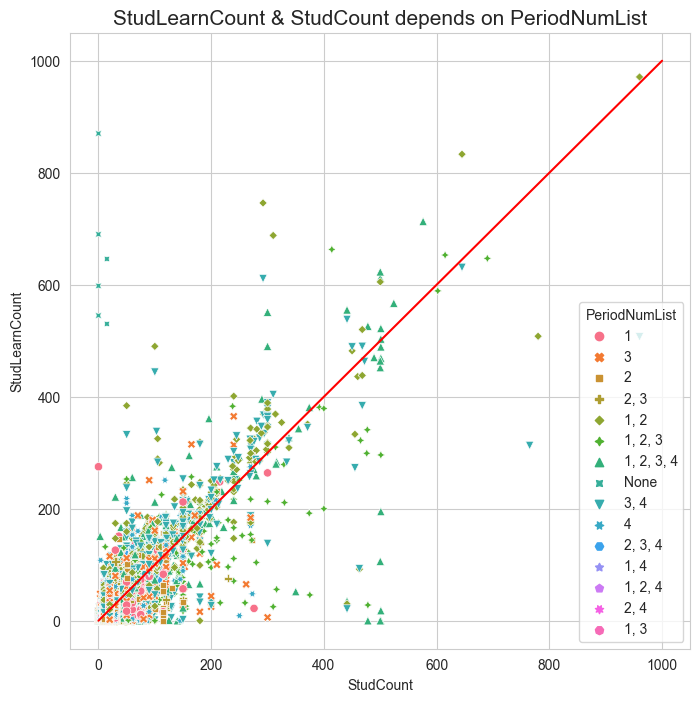

In [78]:
plt.figure(figsize=(8, 8))
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
cond1 = ((df["StudLearnCount"] < 1000) & (df["StudCount"] < 1000))
sns.scatterplot(data=df[cond1],
                x="StudCount", y="StudLearnCount",
               hue="PeriodNumList", style="PeriodNumList")
plt.plot([0, 1000], [0, 1000], color="red")
plt.title("StudLearnCount & StudCount depends on PeriodNumList", fontsize=15)
plt.show()

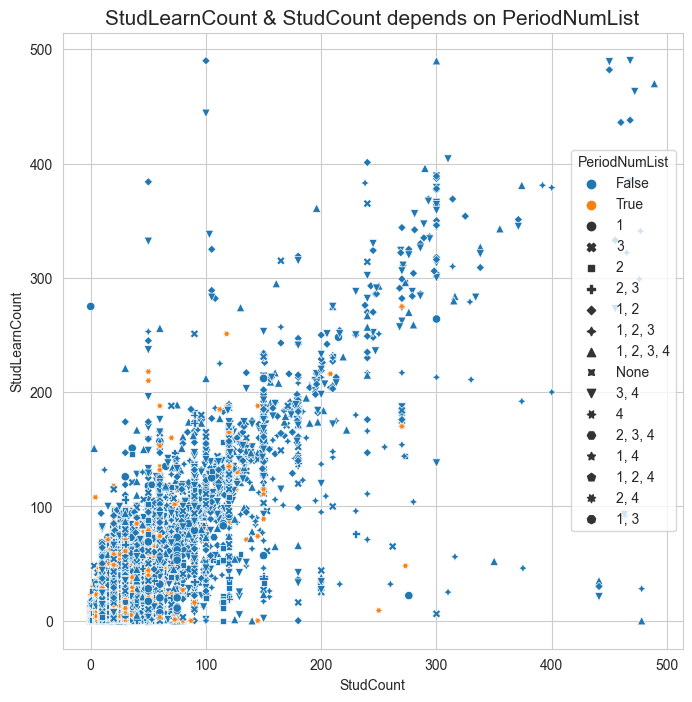

In [104]:
plt.figure(figsize=(8, 8))
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
cond1 = ((df["StudLearnCount"] < 500) & (df["StudCount"] < 500))
sns.scatterplot(data=df[cond1],
                x="StudCount", y="StudLearnCount",
               hue=(df["PeriodNumList"] == "4"), style="PeriodNumList")
# plt.plot([0, 1000], [0, 1000], color="red")
plt.title("StudLearnCount & StudCount depends on PeriodNumList", fontsize=15)
plt.show()

Явно ошибка какая-то df[df["PeriodNumList"] == "1, 2, 2"] (вроде там должно быть 1, 2)

In [27]:
df[df["PeriodNumList"] == "1, 2, 2"]

,ID,ProposalItem,PlanClass_D,EdLevel_D,ItemCourse_D,ItemLearnYear_D,StudCount,StudLearnCount,BachStudCount,MagStudCount,...,ItemSource_D,AudienceScope_D,Credits,EntireHours,LectionHours,SeminarHours,PracticeHours,PeriodNumList,WithOnlineCourse,ItemLearnYear_D_discipline
5094,2840705867,4291908745,Объединенный учебный план,Бакалавриат,Бакалавриат 2 курс,2020/2021 учебный год,24,22,22,0,...,Средства образовательной программы,None,3,114,10,10,0,"1, 2, 2",Нет,2020/2021 учебный год


In [32]:
df.groupby(by=["PeriodNumList"]).count()[["ID"]]

,ID
PeriodNumList,
1,1593
"1, 2",4354
"1, 2, 2",1
"1, 2, 3",1235
"1, 2, 3, 4",1717
"1, 2, 4",5
"1, 3",5
"1, 4",4
2,1596


In [38]:
df.loc[df["PeriodNumList"] == "1, 2, 2", "PeriodNumList"] = "1, 2"

Пофиксила.

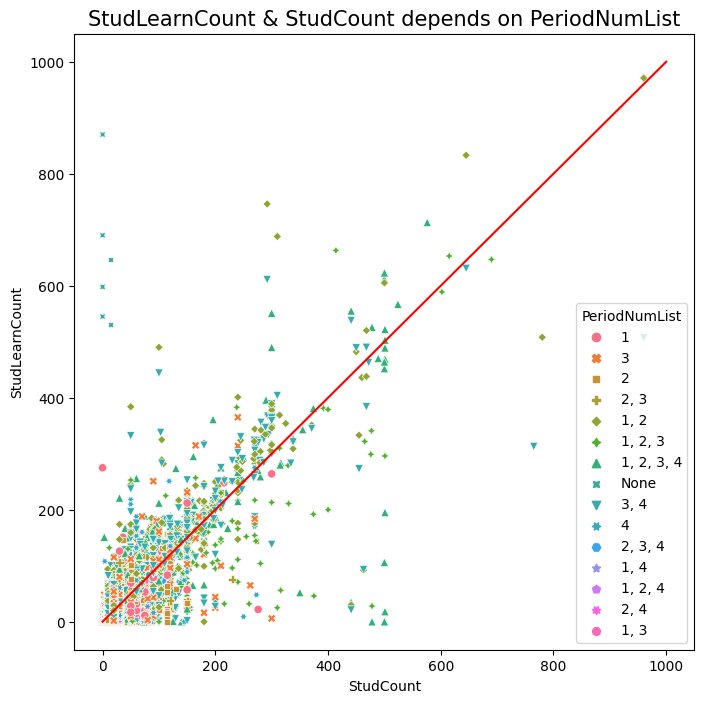

In [56]:
plt.figure(figsize=(8, 8))
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
cond1 = ((df["StudLearnCount"] < 1000) & (df["StudCount"] < 1000))
sns.scatterplot(data=df[cond1],
                x="StudCount", y="StudLearnCount",
               hue="PeriodNumList", style="PeriodNumList")
plt.plot([0, 1000], [0, 1000], color="red")
plt.title("StudLearnCount & StudCount depends on PeriodNumList", fontsize=15)
plt.show()

In [52]:
df.groupby(by=["SubjectClass_D"]).count()[["ID"]]

,ID
SubjectClass_D,
Дисциплина,17532
Научно-исследовательский семинар,1615


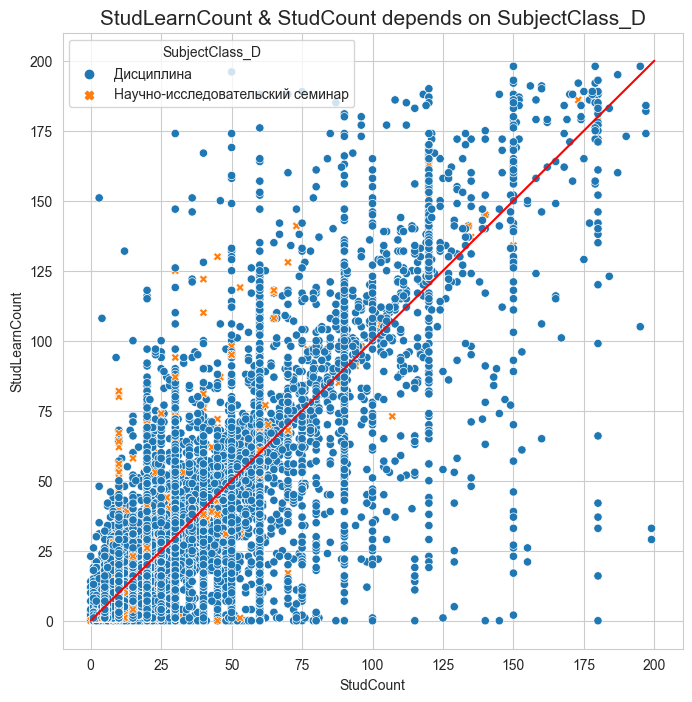

In [106]:
plt.figure(figsize=(8, 8))
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
cond1 = ((df["StudLearnCount"] < 200) & (df["StudCount"] < 200))
sns.scatterplot(data=df[cond1],
                x="StudCount", y="StudLearnCount",
               hue="SubjectClass_D", style="SubjectClass_D")
plt.plot([0, 200], [0, 200], color="red")
plt.title("StudLearnCount & StudCount depends on SubjectClass_D", fontsize=15)
plt.show()

Чек-лист графиков, которые уже есть:

| колонка | да/нет | число уникальных  |
|---|---|---|
| ID   |  - |  19147 |
| ProposalItem  |  - | 16826  |
| PlanClass_D  |   | 4  |
| EdLevel_D | + | 4|
| ItemCourse_D | | 10 |
| ItemLearnYear_D | | 3 |
| StudCount             |-|          269 |
| StudLearnCount          |-|       375 |
| BachStudCount        | |          372 |
| MagStudCount           ||         127 |
| RegDepartment_D          ||         5 |
| Faculty_D                  ||      52 |
| LearnProgram_D      ||            295 |
| Description         ||           7087 |
| LongName            ||           7089 |
| SubjectClass_D      |+|              2 |
| FacDepartment_D     ||            210 |
| FDFaculty_D         ||             53 |
| FDRegDepartment_D     ||            4 |
| MasterItem              |-|      16170 |
| MasterItemPos             |-|    16164 |
| ItemSource_D                ||      4 |
| AudienceScope_D               ||    4 |
| Credits                       ||   24 |
| EntireHours      ||                30 |
| LectionHours       ||              59 |
| SeminarHours         ||            73 |
| PracticeHours          ||         113 |
| PeriodNumList            |+|        15 |
| WithOnlineCourse           |+|       2 |

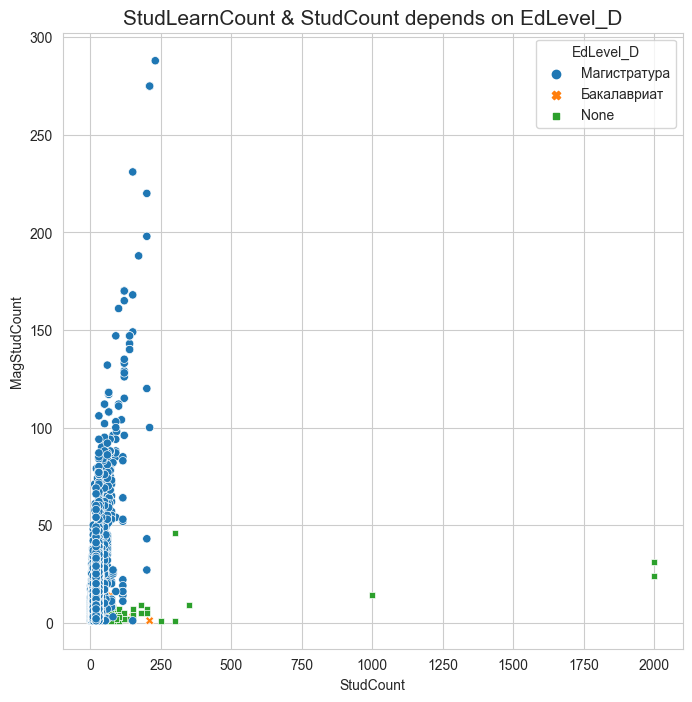

In [107]:
plt.figure(figsize=(8, 8))
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
cond1 = ((df["MagStudCount"] > 0))
sns.scatterplot(data=df[cond1],
                x="StudCount", y="MagStudCount",
               hue="EdLevel_D", style="EdLevel_D")
# plt.plot([0, 200], [0, 200], color="red")
plt.title("StudLearnCount & StudCount depends on EdLevel_D", fontsize=15)
plt.show()

In [64]:
df[(df["MagStudCount"] > 0) & (df["StudCount"] > 1500)]["Description"]

14534    Стартап-школа Бизнес-инкубатора НИУ ВШЭ
14594                      Стартап-школа НИУ ВШЭ
Name: Description, dtype: object

In [66]:
df["ItemLearnYear_D"].unique()

array(['2019/2020 учебный год', '2020/2021 учебный год',
       '2021/2022 учебный год'], dtype=object)

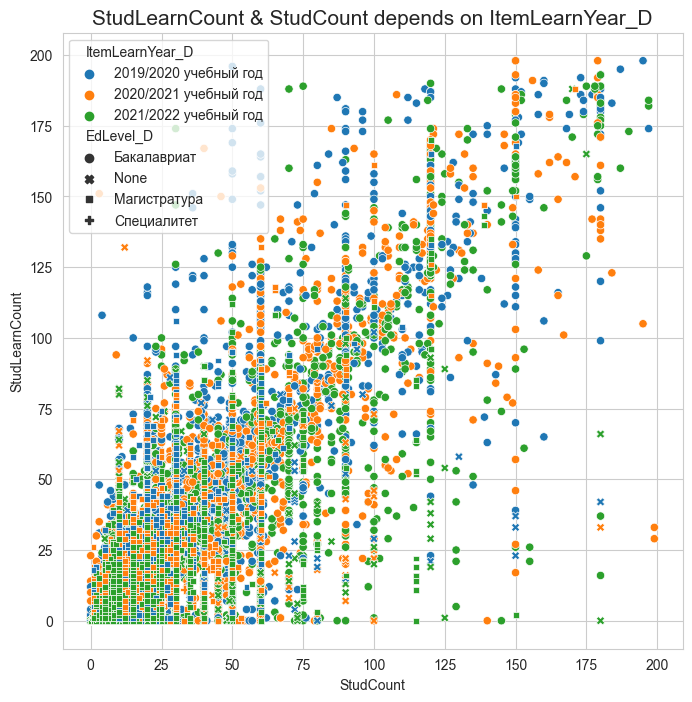

In [112]:
plt.figure(figsize=(8, 8))
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
# cond1 = ((df["MagStudCount"] > 0))
cond2 = ((df["StudLearnCount"] < 200) & (df["StudCount"] < 200))
sns.scatterplot(data=df[cond2],
                x="StudCount", y="StudLearnCount",
               hue="ItemLearnYear_D", style="EdLevel_D")
# plt.plot([0, 200], [0, 200], color="red")
plt.title("StudLearnCount & StudCount depends on ItemLearnYear_D", fontsize=15)
plt.show()

Вообще, интересно было бы посмотреть, если те, для кого читается курс, любые, какое там распределение бакалавров и магистров?

In [116]:
df[df["EdLevel_D"] == "None"]

,ID,ProposalItem,PlanClass_D,EdLevel_D,ItemCourse_D,ItemLearnYear_D,StudCount,StudLearnCount,BachStudCount,MagStudCount,...,ItemSource_D,AudienceScope_D,Credits,EntireHours,LectionHours,SeminarHours,PracticeHours,PeriodNumList,WithOnlineCourse,ItemLearnYear_D_discipline
11377,3628822811,3628845497,Объединенный план факультетских дисциплин,None,None,2019/2020 учебный год,24,18,18,0,...,Средства факультетов,None,7,266,0,0,252,"1, 2, 3, 4",Нет,2019/2020 учебный год
11378,3634857607,3634863441,Объединенный план факультетских дисциплин,None,None,2019/2020 учебный год,94,96,96,0,...,Средства факультетов,None,1,38,0,0,24,"1, 2",Нет,2019/2020 учебный год
11379,4416733405,4416735919,Объединенный план факультетских дисциплин,None,None,2020/2021 учебный год,50,34,34,0,...,Средства университета,None,3,114,0,0,84,"3, 4",Нет,2020/2021 учебный год
11380,3802073159,3802075592,Объединенный план факультетских дисциплин,None,None,2019/2020 учебный год,28,28,28,0,...,Средства факультетов,None,3,114,0,0,84,"3, 4",Нет,2019/2020 учебный год
11381,3802096474,3802098355,Объединенный план факультетских дисциплин,None,None,2019/2020 учебный год,24,15,15,0,...,Средства факультетов,None,3,114,0,0,84,"3, 4",Нет,2019/2020 учебный год
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15159,6424483231,6333460178,Объединенный план факультетских дисциплин,None,None,2021/2022 учебный год,25,1,0,1,...,Средства образовательной программы,для своего кампуса,4,152,0,0,0,4,Да,2021/2022 учебный год
15160,6524465292,6525256755,Объединенный план факультетских дисциплин,None,None,2021/2022 учебный год,1,1,0,1,...,Средства университета,для своего кампуса,6,228,24,24,0,4,Нет,2021/2022 учебный год
15161,4507767653,4507779610,Объединенный план факультетских дисциплин,None,None,2021/2022 учебный год,30,1,0,1,...,Средства университета,для всех кампусов НИУ ВШЭ,3,114,0,16,0,3,Да,2021/2022 учебный год
15162,4502529671,4474840144,Объединенный план факультетских дисциплин,None,None,2021/2022 учебный год,4,1,0,1,...,Средства университета,для всех кампусов НИУ ВШЭ,6,228,22,26,0,"1, 2",Нет,2021/2022 учебный год


In [115]:
df.groupby(by=["ItemCourse_D"]).count()[["ID"]]

,ID
ItemCourse_D,
None,3069
Бакалавриат 1 курс,978
Бакалавриат 2 курс,1557
Бакалавриат 3 курс,3037
Бакалавриат 4 курс,3930
Бакалавриат 5 курс,103
Магистратура 1 курс,3457
Магистратура 2 курс,2998
Специалисты 4 курс,6


Наблюдение: если EdLevel_D = None, то и ItemCourse_D = None

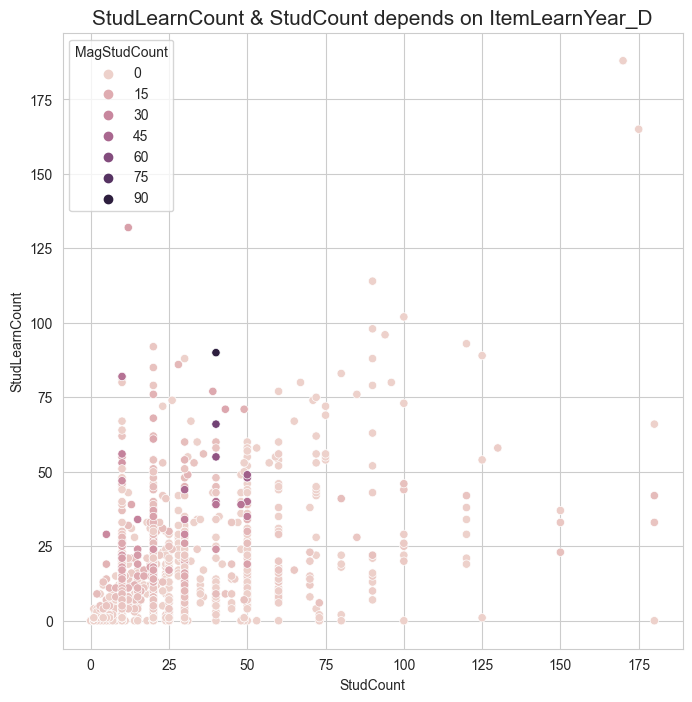

In [122]:
plt.figure(figsize=(8, 8))
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
# cond1 = ((df["MagStudCount"] > 0))
cond2 = ((df["StudLearnCount"] < 200) & (df["StudCount"] < 200))
cond1 = (df["EdLevel_D"] == "None")
sns.scatterplot(data=df[cond1 & cond2],
                x="StudCount", y="StudLearnCount",
               hue="MagStudCount")
# plt.plot([0, 200], [0, 200], color="red")
plt.title("StudLearnCount & StudCount depends on ItemLearnYear_D", fontsize=15)
plt.show()

### Хочу проанализировать по факультетам:

FDFaculty_D -- кто читает

Faculty_D   -- где читается

In [35]:
df[df['FDFaculty_D'] != df['Faculty_D']][['Description', 'FDFaculty_D', 'Faculty_D']]

,Description,FDFaculty_D,Faculty_D
36,Американская политическая риторика,Факультет гуманитарных наук,факультет креативных индустрий
45,Автобиографический рассказ,Факультет гуманитарных наук,факультет креативных индустрий
88,История архитектуры России XX–XXI вв.,Факультет гуманитарных наук,факультет гуманитарных наук
89,Русское искусство второй половины XIX – начала...,Факультет гуманитарных наук,факультет гуманитарных наук
90,Советское искусство 1930-1950-х годов,Факультет гуманитарных наук,факультет гуманитарных наук
...,...,...,...
20762,Российская Империя и Восток: изобразительное и...,Факультет гуманитарных наук,факультет гуманитарных наук
20768,Русистика,Факультет гуманитарных наук,факультет гуманитарных наук
20802,Прикладной социологический анализ рынков,факультет социальных наук,факультет экономических наук
20850,Прикладной социологический анализ рынков,факультет социальных наук,факультет экономических наук


In [36]:
df['FDFaculty_D'].uniqueque()

array(['факультет креативных индустрий', 'Факультет гуманитарных наук',
       'факультет мировой экономики и мировой политики',
       'факультет экономических наук', 'Высшая школа бизнеса',
       'факультет компьютерных наук',
       'Международный институт экономики и финансов', 'факультет права',
       'Институт демографии имени А.Г.Вишневского',
       'факультет социальных наук', 'факультет бизнеса и менеджмента',
       'Московский институт электроники и математики им. А.Н. Тихонова',
       'Высшая школа бизнес-информатики', 'Институт социальной политики',
       'Дирекция по онлайн обучению',
       'Институт прикладных политических исследований',
       'Школа иностранных языков', 'Институт образования',
       'факультет городского и регионального развития',
       'Факультет менеджмента',
       'институт профессиональной переподготовки специалистов',
       'факультет физики', 'факультет математики', 'Банковский институт',
       'Институт торговой политики', 'Общеунивер

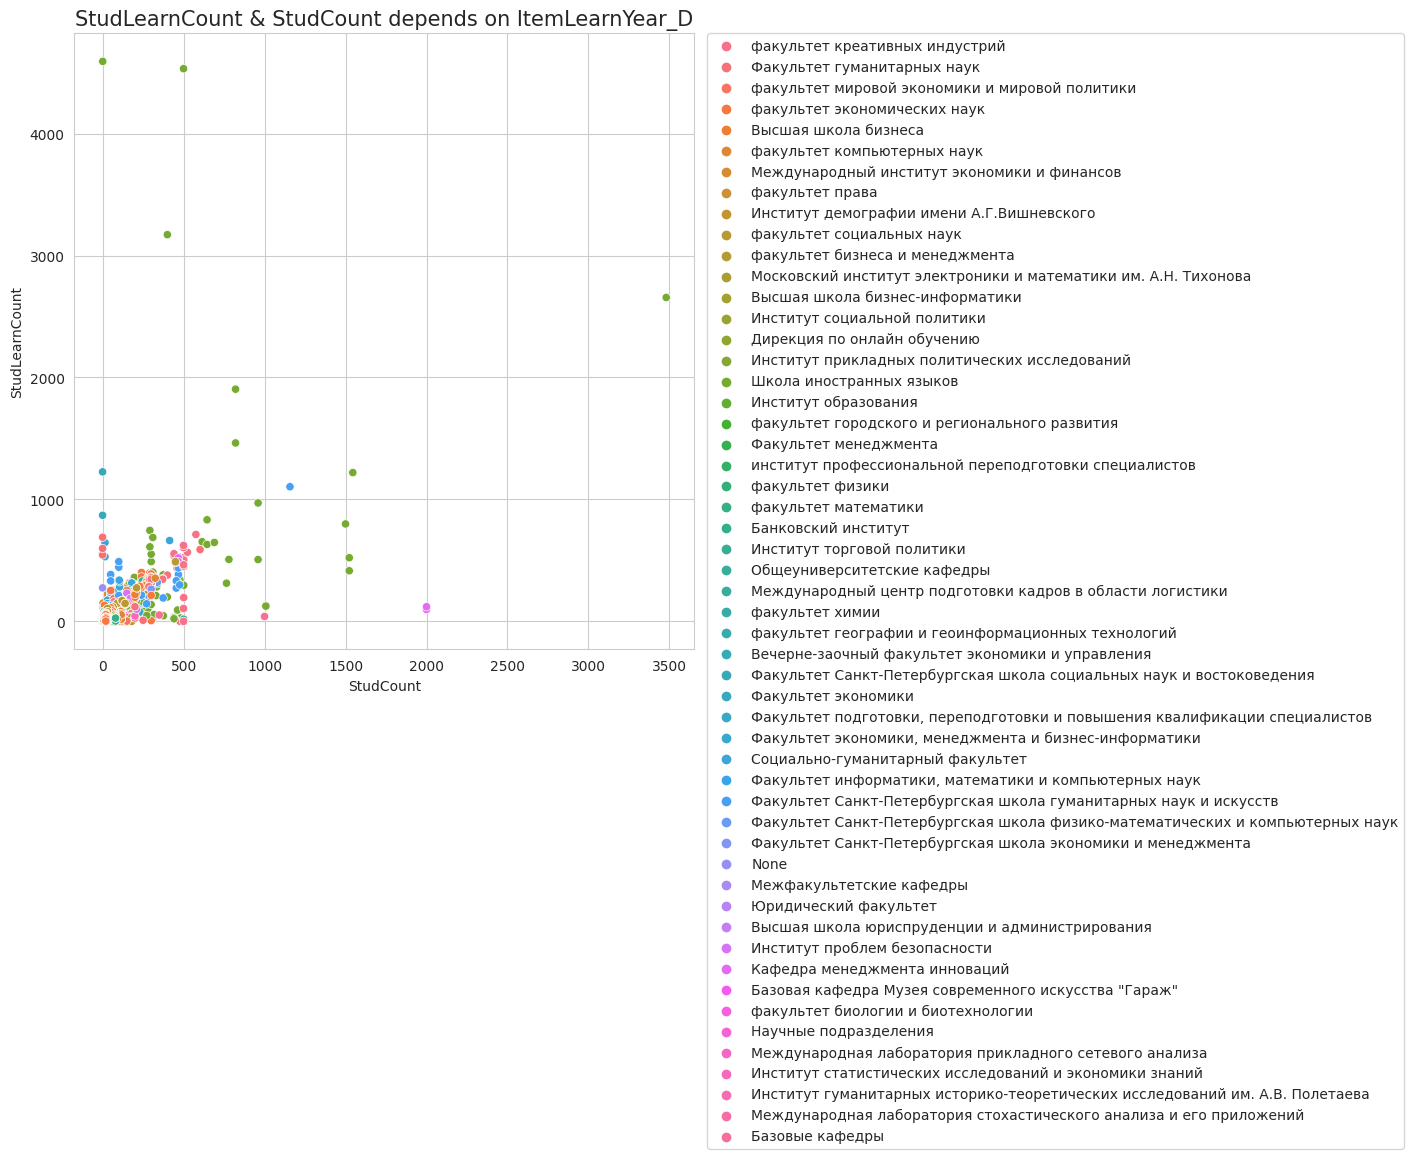

In [44]:
plt.figure(figsize=(8, 8))
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
cond1 = (df['FDFaculty_D'] == 'факультет креативных индустрий')
# cond2 = ((df["StudLearnCount"] < 200) & (df["StudCount"] < 200))
sns.scatterplot(data=df,
                x="StudCount", y="StudLearnCount",
               hue="FDFaculty_D")
# plt.plot([0, 200], [0, 200], color="red")
plt.title("StudLearnCount & StudCount depends on ItemLearnYear_D", fontsize=15)
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0 )

# plt.legend('', frameon=False)
plt.show()

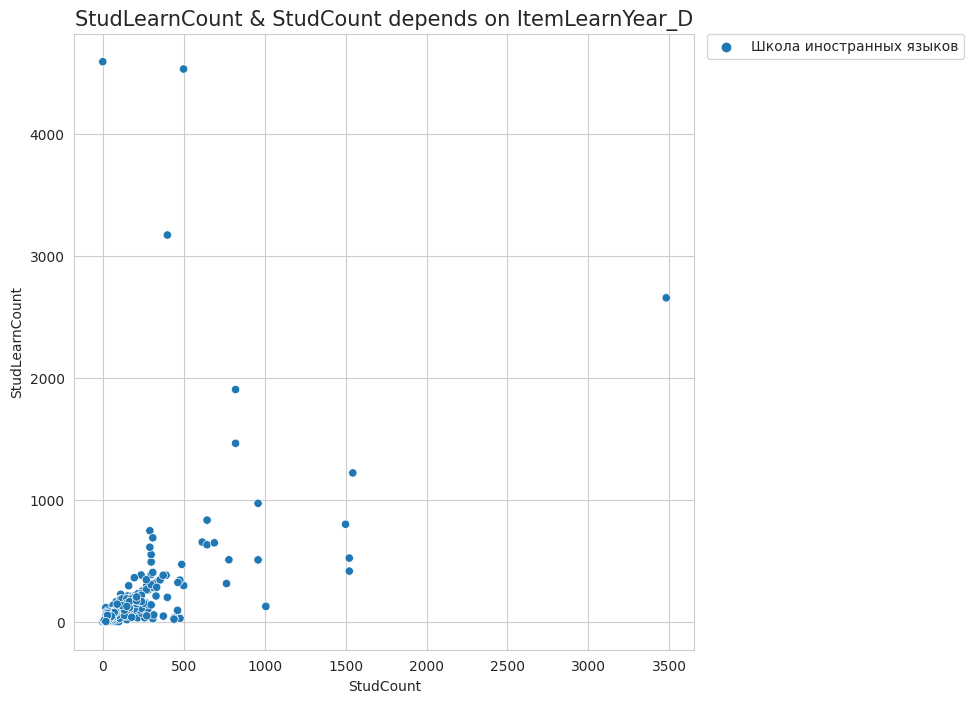

In [46]:
plt.figure(figsize=(8, 8))
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
cond1 = (df['FDFaculty_D'] == 'Школа иностранных языков')
# cond2 = ((df["StudLearnCount"] < 200) & (df["StudCount"] < 200))
sns.scatterplot(data=df[cond1],
                x="StudCount", y="StudLearnCount",
               hue="FDFaculty_D")
# plt.plot([0, 200], [0, 200], color="red")
plt.title("StudLearnCount & StudCount depends on ItemLearnYear_D", fontsize=15)
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0 )

# plt.legend('', frameon=False)
plt.show()

In [73]:
df[(df['FDFaculty_D'] == 'Школа иностранных языков') & (abs(df['StudCount'] - df['StudLearnCount']) > 1000)][['Description', 'ItemLearnYear_D']]

,Description,ItemLearnYear_D
9859,Английский язык,2019/2020 учебный год
9860,Английский язык,2019/2020 учебный год
9887,Английский язык для общих коммуникативных целе...,2020/2021 учебный год
9915,Английский язык для общих коммуникативных целе...,2020/2021 учебный год
9919,Английский язык для общих коммуникативных целе...,2020/2021 учебный год
9941,Английский язык,2020/2021 учебный год


Большие выбросы происходят в тех дисциплинах, которые реализует Школа иностранных языков?

Получается и правда так.

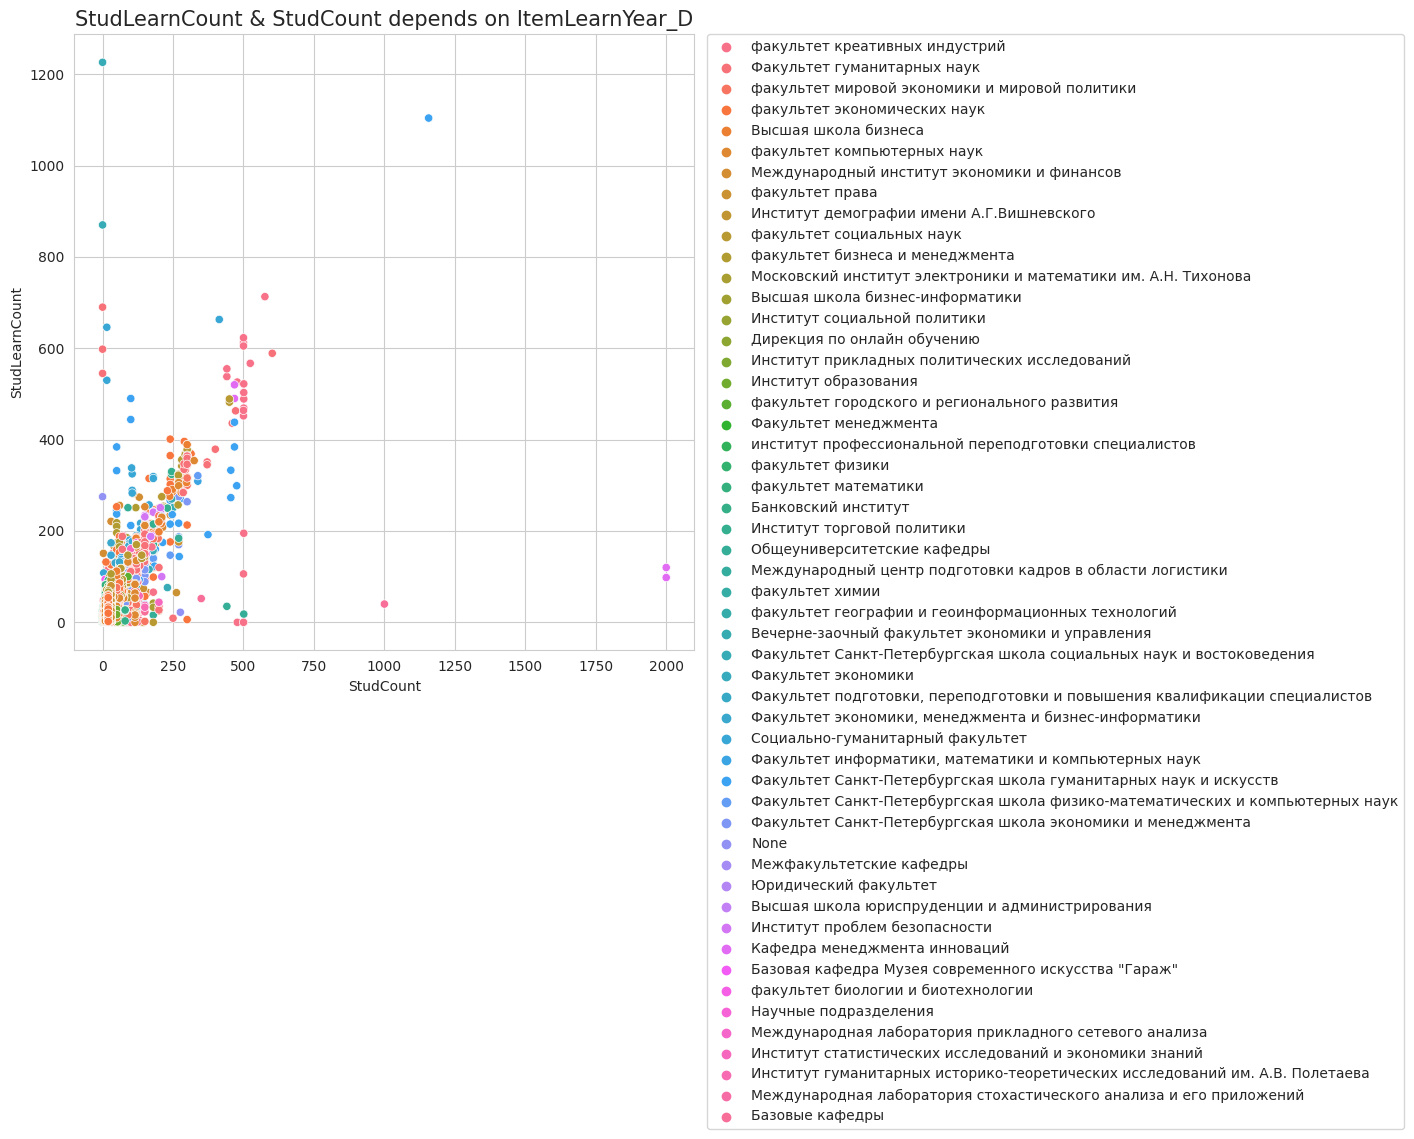

In [47]:
plt.figure(figsize=(8, 8))
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
cond1 = (df['FDFaculty_D'] != 'Школа иностранных языков')
# cond2 = ((df["StudLearnCount"] < 200) & (df["StudCount"] < 200))
sns.scatterplot(data=df[cond1],
                x="StudCount", y="StudLearnCount",
               hue="FDFaculty_D")
# plt.plot([0, 200], [0, 200], color="red")
plt.title("StudLearnCount & StudCount depends on ItemLearnYear_D", fontsize=15)
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0 )

# plt.legend('', frameon=False)
plt.show()

Следующие выбросы (2000, <200) -- Кафедра менеджмента инноваций.

Оказывается это Стартап-школа Бизнес-инкубатора НИУ ВШЭ и Стартап-школа НИУ ВШЭ.

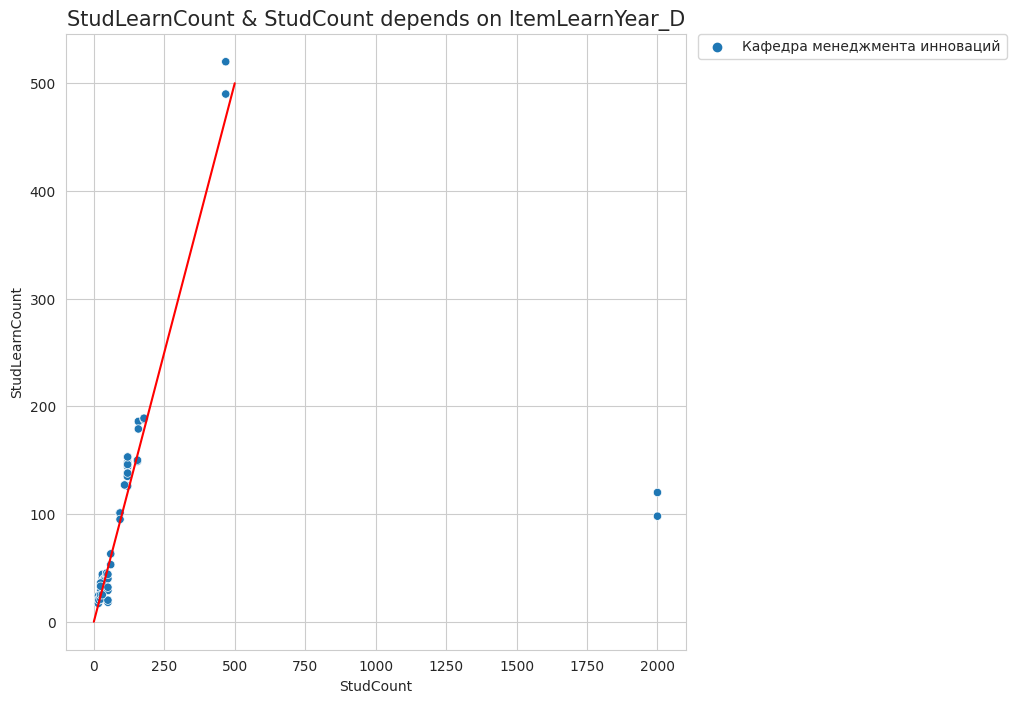

In [53]:
plt.figure(figsize=(8, 8))
cond1 = (df['FDFaculty_D'] == 'Кафедра менеджмента инноваций')
# cond2 = ((df["StudLearnCount"] < 400) & (df["StudCount"] < 400))
sns.scatterplot(data=df[cond1],
                x="StudCount", y="StudLearnCount",
               hue="FDFaculty_D")
plt.plot([0, 500], [0, 500], color="red")
plt.title("StudLearnCount & StudCount depends on ItemLearnYear_D", fontsize=15)
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0 )
plt.show()

In [56]:
df[(df['FDFaculty_D'] == 'Кафедра менеджмента инноваций') & (abs(df['StudCount'] - df['StudLearnCount']) > 100)]['Description']

14534    Стартап-школа Бизнес-инкубатора НИУ ВШЭ
14594                      Стартап-школа НИУ ВШЭ
Name: Description, dtype: object

In [57]:
del_fucs = ['Школа иностранных языков', 'Кафедра менеджмента инноваций']

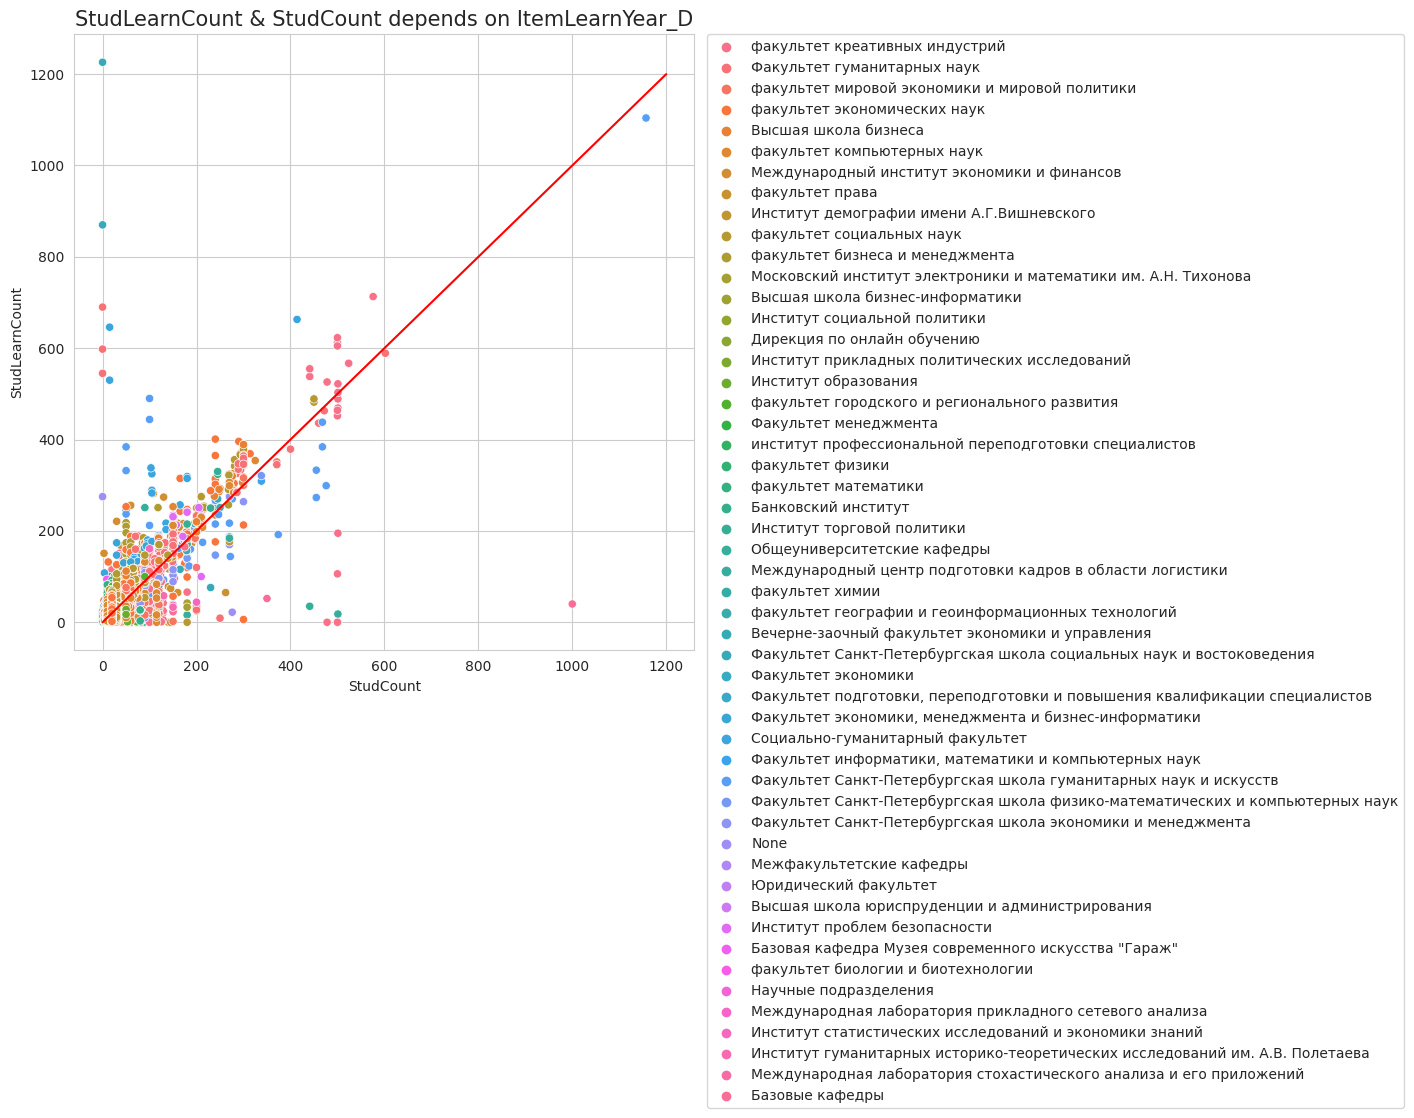

In [59]:
plt.figure(figsize=(8, 8))
cond1 = (~df['FDFaculty_D'].isin(del_fucs))
# cond2 = ((df["StudLearnCount"] < 200) & (df["StudCount"] < 200))
sns.scatterplot(data=df[cond1],
                x="StudCount", y="StudLearnCount",
               hue="FDFaculty_D")
plt.plot([0, 1200], [0, 1200], color="red")
plt.title("StudLearnCount & StudCount depends on ItemLearnYear_D", fontsize=15)
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0 )

plt.show()

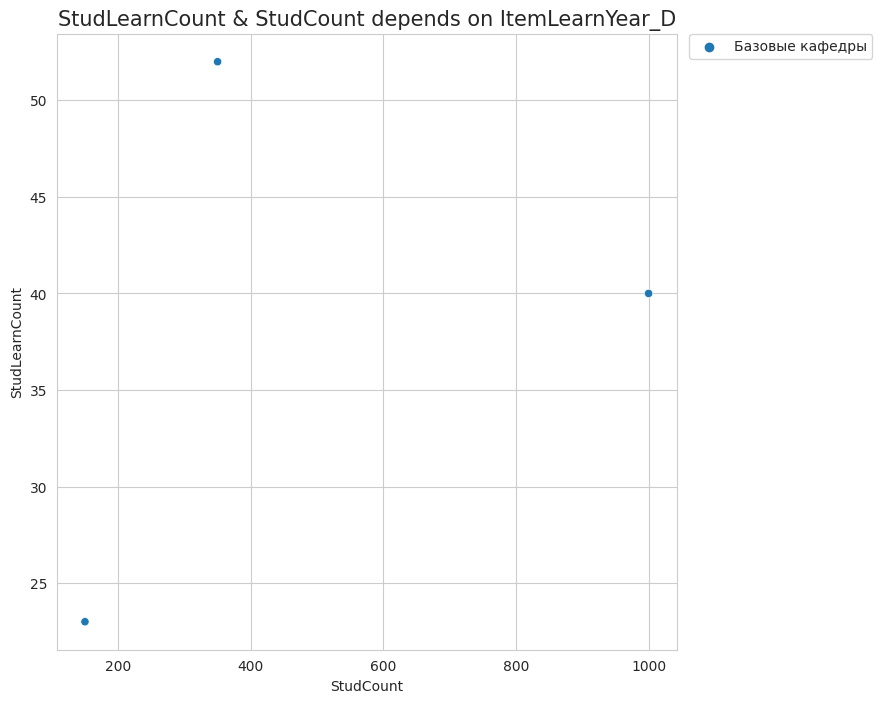

In [75]:
plt.figure(figsize=(8, 8))
cond1 = (df['FDFaculty_D'] == 'Базовые кафедры')
# cond2 = ((df["StudLearnCount"] < 400) & (df["StudCount"] < 400))
sns.scatterplot(data=df[cond1],
                x="StudCount", y="StudLearnCount",
               hue="FDFaculty_D")
# plt.plot([0, 100], [0, 100], color="red")
plt.title("StudLearnCount & StudCount depends on ItemLearnYear_D", fontsize=15)
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0 )
plt.show()

In [81]:
df[df['FDFaculty_D'] == "Базовые кафедры"][['Description', 'ItemLearnYear_D', 'StudCount', 'StudLearnCount']]

,Description,ItemLearnYear_D,StudCount,StudLearnCount
14526,GR в современной России: теория и практика,2019/2020 учебный год,150,23
14556,GR в современной России: теория и практика,2020/2021 учебный год,1000,40
14600,GR в современной России: теория и практика,2021/2022 учебный год,350,52


Посмотрим на количество курсов, который реализует каждый факультет:

In [90]:
a = df.groupby(by="FDFaculty_D").count()[['ID']]
a.sort_values(by='ID')

,ID
FDFaculty_D,
Дирекция по онлайн обучению,1
None,2
Базовые кафедры,3
факультет географии и геоинформационных технологий,5
Межфакультетские кафедры,9
Международная лаборатория стохастического анализа и его приложений,9
Международный центр подготовки кадров в области логистики,10
Институт социальной политики,13
Институт прикладных политических исследований,16


In [92]:
df[df['FDFaculty_D'] == 'Дирекция по онлайн обучению'][['Description', 'ItemLearnYear_D', 'StudCount', 'StudLearnCount']]

,Description,ItemLearnYear_D,StudCount,StudLearnCount
183,Основы европейского предпринимательского права,2019/2020 учебный год,30,18


In [93]:
df[df['FDFaculty_D'] == 'None'][['Description', 'ItemLearnYear_D', 'StudCount', 'StudLearnCount']]

,Description,ItemLearnYear_D,StudCount,StudLearnCount
6955,Безопасность жизнедеятельности,2019/2020 учебный год,0,275
6956,Безопасность жизнедеятельности,2019/2020 учебный год,276,22


In [94]:
df[df['FDFaculty_D'] == 'факультет географии и геоинформационных технологий'][['Description', 'ItemLearnYear_D', 'StudCount', 'StudLearnCount']]

,Description,ItemLearnYear_D,StudCount,StudLearnCount
5127,Оформление карт и геоинфографика,2021/2022 учебный год,18,17
5140,Методы сбора данных в географических исследова...,2021/2022 учебный год,18,15
5158,"Инженерная география: инвестиции, проектирован...",2021/2022 учебный год,18,19
14535,Введение в геоинформационные системы и технологии,2020/2021 учебный год,50,19
14578,Введение в геоинформационные системы и технологии,2021/2022 учебный год,60,13


In [96]:
df[df['FDFaculty_D'] == 'Межфакультетские кафедры'][['Description', 'ItemLearnYear_D', 'StudCount', 'StudLearnCount', 'Faculty_D']]

,Description,ItemLearnYear_D,StudCount,StudLearnCount,Faculty_D
7355,Физическая культура,2019/2020 учебный год,28,1,Факультет Санкт-Петербургская школа социальных...
7393,Физическая культура,2019/2020 учебный год,58,88,Факультет Санкт-Петербургская школа социальных...
8369,Физическая культура,2019/2020 учебный год,53,67,Факультет Санкт-Петербургская школа социальных...
8374,Физическая культура,2020/2021 учебный год,0,1,Факультет Санкт-Петербургская школа социальных...
8439,Физическая культура,2020/2021 учебный год,83,84,Факультет Санкт-Петербургская школа социальных...
8455,Физическая культура,2019/2020 учебный год,15,0,Факультет Санкт-Петербургская школа социальных...
9170,Физическая культура,2020/2021 учебный год,67,65,Факультет Санкт-Петербургская школа социальных...
9206,Физическая культура,2021/2022 учебный год,80,0,Факультет Санкт-Петербургская школа социальных...
9209,Физическая культура,2020/2021 учебный год,0,0,Факультет Санкт-Петербургская школа социальных...


In [98]:
df[df['FDFaculty_D'] == 'Международная лаборатория стохастического анализа и его приложений'][['Description', 'ItemLearnYear_D', 'StudCount', 'StudLearnCount', 'Faculty_D']]

,Description,ItemLearnYear_D,StudCount,StudLearnCount,Faculty_D
13356,Введение в финансовую теорию риска,2019/2020 учебный год,10,0,факультет экономических наук
16602,Введение в финансовую математику,2020/2021 учебный год,5,11,факультет экономических наук
16603,Введение в финансовую теoрию риска,2020/2021 учебный год,5,12,факультет экономических наук
17078,Введение в стохастические дифференциальные ура...,2020/2021 учебный год,5,6,факультет экономических наук
17723,Введение в финансовую математику,2019/2020 учебный год,10,8,факультет экономических наук
17881,Введение в финансовую математику,2021/2022 учебный год,10,9,факультет экономических наук
17892,Введение в финансовую математику,2021/2022 учебный год,10,4,факультет экономических наук
19994,Введение в финансовую математику,2021/2022 учебный год,10,3,факультет экономических наук
20852,Введение в стохастические дифференциальные ура...,2021/2022 учебный год,20,13,факультет экономических наук


In [ ]:
Базовая кафедра Музея современного искусства "Гараж"

In [100]:
df[df['FDFaculty_D'] == 'Базовая кафедра Музея современного искусства "Гараж"'][['Description', 'ItemLearnYear_D', 'StudCount', 'StudLearnCount', 'Faculty_D']]

,Description,ItemLearnYear_D,StudCount,StudLearnCount,Faculty_D
10589,Современное искусство в России,2019/2020 учебный год,120,124,"Базовая кафедра Музея современного искусства ""..."
10590,Профессии в арт-мире,2019/2020 учебный год,120,123,"Базовая кафедра Музея современного искусства ""..."
10654,Современное искусство. Введение,2019/2020 учебный год,60,97,"Базовая кафедра Музея современного искусства ""..."
10655,История музейно-выставочного дела,2019/2020 учебный год,60,99,"Базовая кафедра Музея современного искусства ""..."
10656,Современное искусство в России,2020/2021 учебный год,9,94,"Базовая кафедра Музея современного искусства ""..."
10657,Профессии в арт-мире,2020/2021 учебный год,90,93,"Базовая кафедра Музея современного искусства ""..."
10692,Профессии в арт-мире,2021/2022 учебный год,106,96,"Базовая кафедра Музея современного искусства ""..."
10693,Современное искусство. Введение,2020/2021 учебный год,120,124,"Базовая кафедра Музея современного искусства ""..."
10695,Современное искусство в России,2021/2022 учебный год,106,101,"Базовая кафедра Музея современного искусства ""..."
10697,История музейно-выставочного дела,2020/2021 учебный год,120,123,"Базовая кафедра Музея современного искусства ""..."


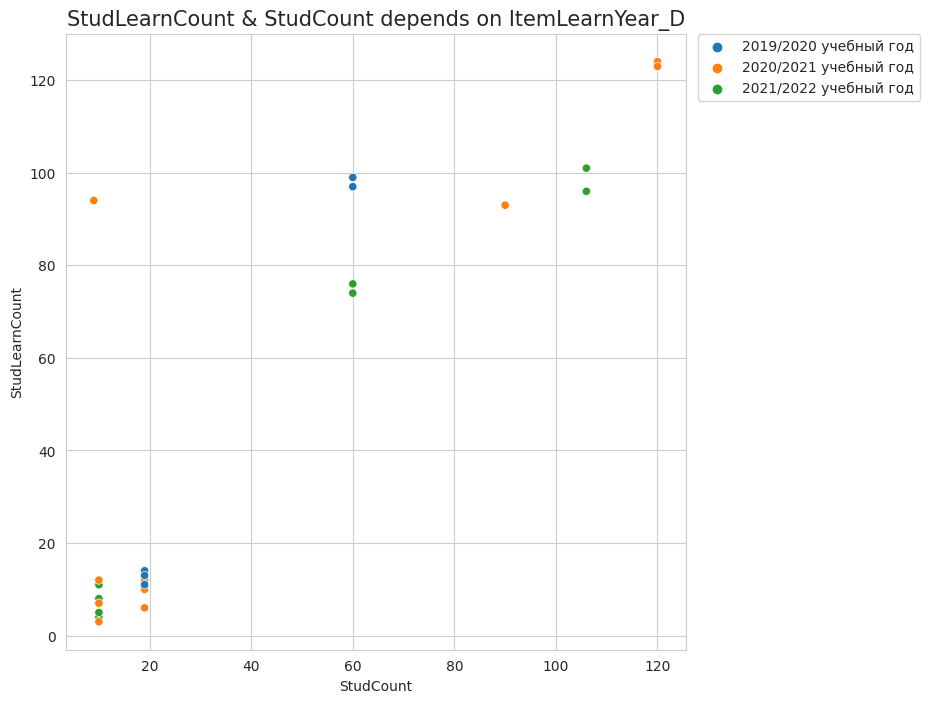

In [107]:
plt.figure(figsize=(8, 8))
cond1 = (df['FDFaculty_D'] == 'Базовая кафедра Музея современного искусства "Гараж"')
# cond2 = ((df["StudLearnCount"] < 400) & (df["StudCount"] < 400))
sns.scatterplot(data=df[cond1],
                x="StudCount", y="StudLearnCount",
               hue="ItemLearnYear_D")
# plt.plot([0, 120], [0, 120], color="red")
plt.title("StudLearnCount & StudCount depends on ItemLearnYear_D", fontsize=15)
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0 )
plt.show()

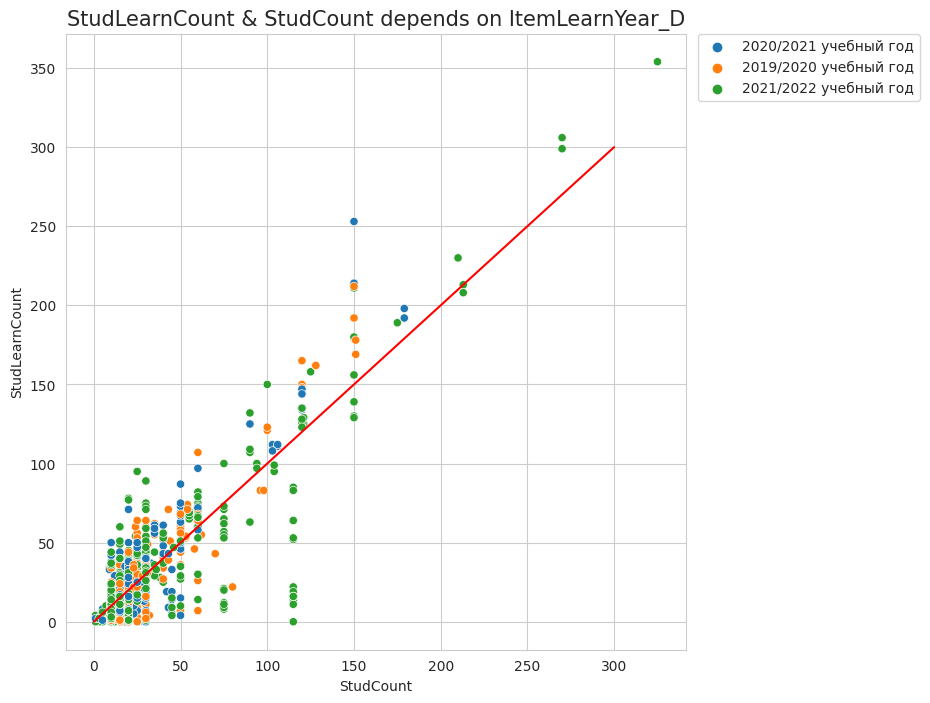

In [109]:
plt.figure(figsize=(8, 8))
cond1 = (df['FDFaculty_D'] == 'факультет компьютерных наук')
# cond2 = ((df["StudLearnCount"] < 400) & (df["StudCount"] < 400))
sns.scatterplot(data=df[cond1],
                x="StudCount", y="StudLearnCount",
               hue="ItemLearnYear_D")
plt.plot([0, 300], [0, 300], color="red")
plt.title("StudLearnCount & StudCount depends on ItemLearnYear_D", fontsize=15)
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0 )
plt.show()

In [ ]:
Институт образования

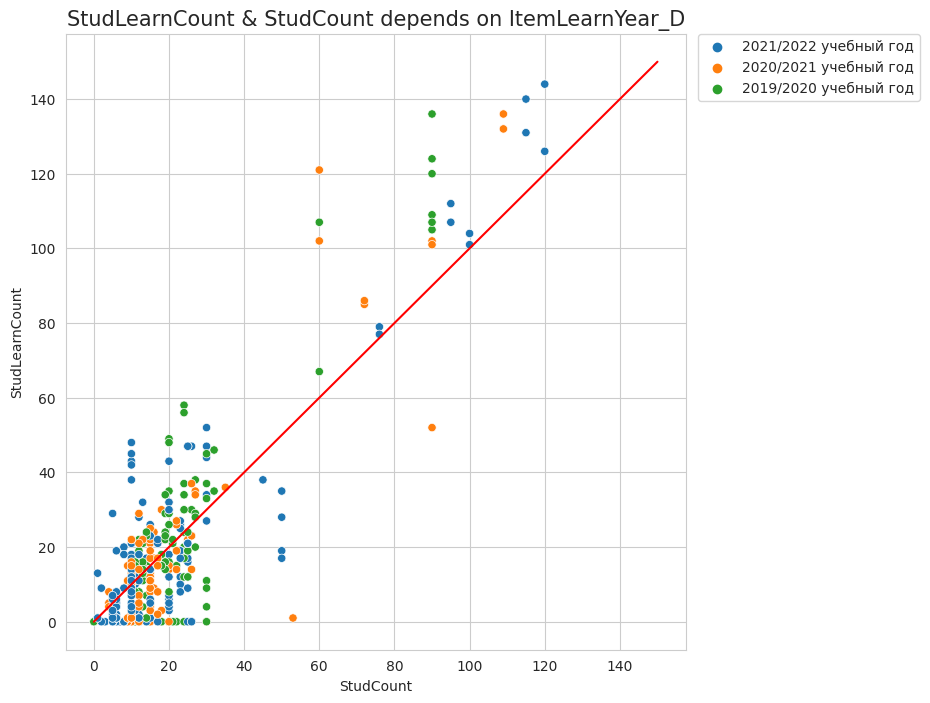

In [111]:
plt.figure(figsize=(8, 8))
cond1 = (df['FDFaculty_D'] == 'Институт образования')
# cond2 = ((df["StudLearnCount"] < 400) & (df["StudCount"] < 400))
sns.scatterplot(data=df[cond1],
                x="StudCount", y="StudLearnCount",
               hue="ItemLearnYear_D")
plt.plot([0, 150], [0, 150], color="red")
plt.title("StudLearnCount & StudCount depends on ItemLearnYear_D", fontsize=15)
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0 )
plt.show()

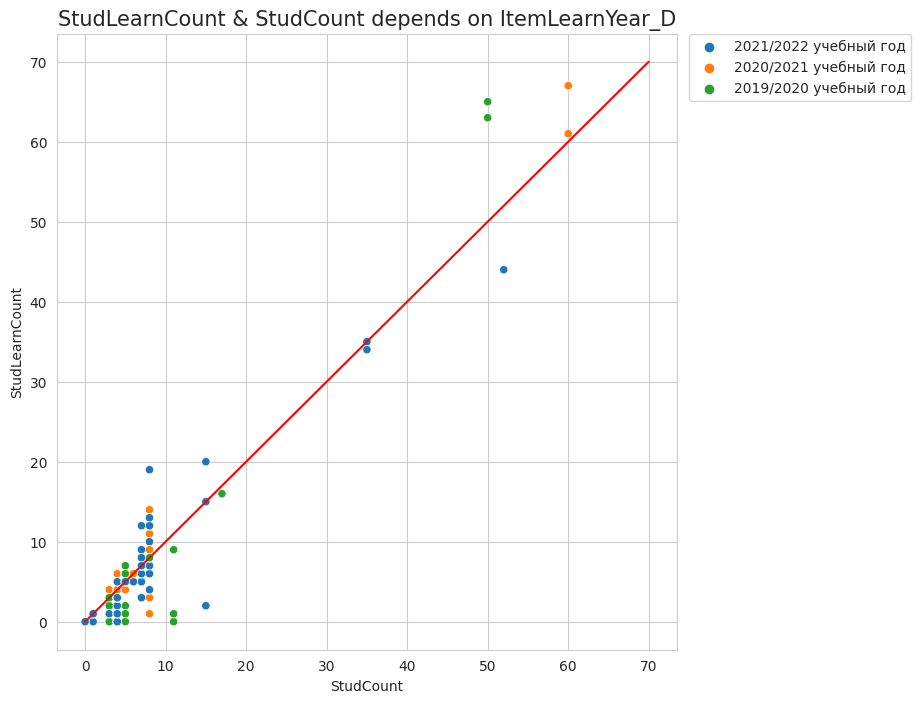

In [123]:
plt.figure(figsize=(8, 8))
cond1 = (df['FDFaculty_D'] == 'факультет физики')
cond2 = ((df["StudLearnCount"] < 10) & (df["StudCount"] < 10))
sns.scatterplot(data=df[cond1],
                x="StudCount", y="StudLearnCount",
               hue="ItemLearnYear_D")
plt.plot([0, 70], [0, 70], color="red")
plt.title("StudLearnCount & StudCount depends on ItemLearnYear_D", fontsize=15)
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0 )
plt.show()

In [117]:
df[df['FDFaculty_D'] == 'факультет физики'][['Description', 'ItemLearnYear_D', 'StudCount', 'StudLearnCount', 'Faculty_D']]

,Description,ItemLearnYear_D,StudCount,StudLearnCount,Faculty_D
386,Физика низких температур,2021/2022 учебный год,8,10,факультет физики
389,Физика металлов и электронные явления,2021/2022 учебный год,8,10,факультет физики
390,Сверхпроводимость,2021/2022 учебный год,8,10,факультет физики
432,Солнечная система и планеты других звезд,2020/2021 учебный год,3,2,факультет физики
562,Статистический анализ данных космического эксп...,2021/2022 учебный год,8,11,факультет физики
...,...,...,...,...,...
19590,"Научно-исследовательский семинар ""Эксперимента...",2021/2022 учебный год,5,5,факультет физики
19592,Введение в физику плазмы,2021/2022 учебный год,5,5,факультет физики
19593,Небесная механика,2021/2022 учебный год,5,5,факультет физики
19594,Плазменная астрофизика,2021/2022 учебный год,5,5,факультет физики


In [173]:
df[(df['FDFaculty_D'] == 'факультет физики') & (abs(df['StudCount'] - df['StudLearnCount']) > 15)]

,ID,ProposalItem,PlanClass_D,EdLevel_D,ItemCourse_D,ItemLearnYear_D,StudCount,StudLearnCount,BachStudCount,MagStudCount,...,MasterItemPos,ItemSource_D,AudienceScope_D,Credits,EntireHours,LectionHours,SeminarHours,PracticeHours,PeriodNumList,WithOnlineCourse


На факультете физики нету разницы >15!!

# Загружаем df и работаем с None

Как мы работаем с None в разных колонках (идем по нарастающей):

1) Для ```LongName``` вставим поле Description (что значит None там непонятно).

2) Для ```FDFaculty_D``` (это курсы "Безопасность жизнедеятельности") - непонятно, как одназночно и гарантированно идентифицировать что там, поэтому я их просто удалю (2 записи)

3) ```MasterItemPos``` после рассуждений было решено удалить как колонку (соображения на этот счет ниже)

4) ```ItemSource_D``` -- что делать непонятно (не смогла найти информацию о финанчировании на странице курса), всего 12 штук, поэтому можно удалить или заменить на что-нибудь и так учить. В изначальном варианте удаляю.

5) ```PeriodNumList``` - непонятно, вернусь позже (удалять не хочется, посомтрела в курсах, ситация неоднозначаная)

6) ```Faculty_D```

In [264]:
df.isna().sum()

ID                       0
ProposalItem             0
PlanClass_D              0
EdLevel_D             1355
ItemCourse_D          3069
ItemLearnYear_D          0
StudCount                0
StudLearnCount           0
BachStudCount            0
MagStudCount             0
RegDepartment_D        753
Faculty_D              753
LearnProgram_D        3057
Description              0
LongName                 0
SubjectClass_D           0
FacDepartment_D          0
FDFaculty_D              0
FDRegDepartment_D        0
MasterItem               0
ItemSource_D             0
AudienceScope_D      11639
Credits                  0
EntireHours              0
LectionHours             0
SeminarHours             0
PracticeHours            0
PeriodNumList           56
WithOnlineCourse         0
dtype: int64

In [261]:
len(df)

19133

In [182]:
df.loc[df['LongName'].isna(), 'LongName'] = df[df['LongName'].isna()]['Description']

In [183]:
df = df[~df['FDFaculty_D'].isna()]

In [238]:
df = df.drop(columns="MasterItemPos")

In [260]:
df = df[~df["ItemSource_D"].isna()]

In [ ]:
df['EdLevel_D'] = df['EdLevel_D'].fillna("All")
df['ItemCourse_D'] = df['ItemCourse_D'].fillna("All")
df['PeriodNumList'] = df['PeriodNumList'].fillna("All")

In [247]:
info_columns = ['ID', 'ProposalItem', 'PlanClass_D', 'ItemCourse_D', 'ItemSource_D',
       'ItemLearnYear_D', 'Faculty_D', 'LearnProgram_D',
       'Description', 'LongName', 'SubjectClass_D', 'FacDepartment_D',
       'FDFaculty_D', 'FDRegDepartment_D', 'MasterItem',
       'ItemSource_D', 'Credits', 'EntireHours', 'PeriodNumList',
       'WithOnlineCourse']

In [265]:
df.ItemSource_D.unique()

array(['средства университета', 'средства образовательной программы',
       'средства факультетов'], dtype=object)

In [266]:
df[df["Faculty_D"].isna()][info_columns]

,ID,ProposalItem,PlanClass_D,ItemCourse_D,ItemSource_D,ItemLearnYear_D,Faculty_D,LearnProgram_D,Description,LongName,SubjectClass_D,FacDepartment_D,FDFaculty_D,FDRegDepartment_D,MasterItem,ItemSource_D,Credits,EntireHours,PeriodNumList,WithOnlineCourse
9516,2906647702,2906769751,объединенный план общевузовских дисциплин,NaN,средства университета,2019/2020 учебный год,NaN,NaN,английский язык,английский язык,дисциплина,департамент иностранных языков,факультет санкт-петербургская школа социальных...,ниу вшэ - санкт-петербург,2906769727,средства университета,4,152,NaN,нет
9517,2906647772,2906771328,объединенный план общевузовских дисциплин,NaN,средства университета,2019/2020 учебный год,NaN,NaN,английский язык,английский язык,дисциплина,департамент иностранных языков,факультет санкт-петербургская школа социальных...,ниу вшэ - санкт-петербург,2906771265,средства университета,2,76,NaN,нет
9518,2906532589,2906599781,объединенный план общевузовских дисциплин,NaN,средства университета,2019/2020 учебный год,NaN,NaN,русский язык как иностранный. уровень а2,русский язык как иностранный. уровень а2,дисциплина,департамент иностранных языков,факультет санкт-петербургская школа социальных...,ниу вшэ - санкт-петербург,2906599677,средства университета,8,304,"3, 4",нет
9519,2906532769,2906602165,объединенный план общевузовских дисциплин,NaN,средства университета,2019/2020 учебный год,NaN,NaN,русский язык как иностранный. уровень в1,русский язык как иностранный. уровень в1,дисциплина,департамент иностранных языков,факультет санкт-петербургская школа социальных...,ниу вшэ - санкт-петербург,2906602082,средства университета,8,304,"1, 2",нет
9520,2906647902,2906774902,объединенный план общевузовских дисциплин,NaN,средства университета,2019/2020 учебный год,NaN,NaN,английский для начинающих,английский для начинающих,дисциплина,департамент иностранных языков,факультет санкт-петербургская школа социальных...,ниу вшэ - санкт-петербург,2906774689,средства университета,8,304,NaN,нет
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13708,4517363495,4448721049,объединенный план общевузовских дисциплин,NaN,средства университета,2021/2022 учебный год,NaN,NaN,буддизм как религия и философия,буддизм как религия и философия,дисциплина,школа философии и культурологии,факультет гуманитарных наук,москва,4448719910,средства университета,3,114,3,нет
13709,4517352628,4448721373,объединенный план общевузовских дисциплин,NaN,средства университета,2021/2022 учебный год,NaN,NaN,психология креативности,психология креативности,дисциплина,департамент психологии,факультет социальных наук,москва,4448720020,средства университета,3,114,3,нет
13710,4517364387,4478229319,объединенный план общевузовских дисциплин,NaN,средства университета,2021/2022 учебный год,NaN,NaN,философское введение в живопись 20 века,философское введение в живопись 20 века,дисциплина,школа философии и культурологии,факультет гуманитарных наук,москва,4478204251,средства университета,3,114,4,нет
13711,4517192383,4450542651,объединенный план общевузовских дисциплин,NaN,средства университета,2021/2022 учебный год,NaN,NaN,критические исследования данных,критические исследования данных,дисциплина,институт медиа,факультет креативных индустрий,москва,4450542061,средства университета,3,114,4,нет


### Разберемся с колонками 'ID', 'ProposalItem', 'MasterItem', 'MasterItemPos'

```ID```, -- ID дисциплины (ID записи РУП ППК, по нему другие таблицы будут привязаны)

```MasterItem``` -- ID дисциплины (ID записи БУП ППК, будет одна и та же для нескольких записей разных годов обучения, если это одна и та же дисциплина, которая идет нескольк лет)

```MasterItemPos``` -- Порядковый номер базовой записи, сюда записывают идентифкатор дисциплины ППК SmartPlan, вероятно будет нужен 

```ProposalItem``` -- Идентификатор связанной записи дисциплины РУП ППК (связь с таблицей 1)

In [134]:
df[['ID', 'ProposalItem', 'MasterItem', 'MasterItemPos']]

,ID,ProposalItem,MasterItem,MasterItemPos
0,2841075702,2865810374,2865810365,20945.0
1,2841080394,2865810719,2865810715,20947.0
2,2841083512,2865811719,2865811692,20959.0
3,2841086181,2865811996,2865811991,20787.0
4,2841143136,2865843661,2865843651,21517.0
...,...,...,...,...
19142,4502475287,4466805473,4466439487,256583.0
19143,4504446723,4449156989,4449152741,239124.0
19144,4504447639,4449156466,4449152704,239104.0
19145,4505861343,4505861336,4505726728,297787.0


In [156]:
df.MasterItem.unique()

array([2865810365, 2865810715, 2865811692, ..., 4482323321, 4500207247,
       4449152704])

In [203]:
all_povt_MasterItem = []
for i in df.MasterItem.unique():
    if len(df[df['MasterItem'] == i]) > 1:
        all_povt_MasterItem.append(i)
len(all_povt_MasterItem)

1720

In [244]:
info_columns = ['ID', 'ProposalItem', 'PlanClass_D', 'ItemCourse_D',
       'ItemLearnYear_D', 'Faculty_D', 'LearnProgram_D',
       'Description', 'LongName', 'SubjectClass_D', 'FacDepartment_D',
       'FDFaculty_D', 'FDRegDepartment_D', 'MasterItem', 'MasterItemPos',
       'ItemSource_D', 'Credits', 'EntireHours', 'PeriodNumList',
       'WithOnlineCourse']

In [214]:
df[df['MasterItem'] == all_povt_MasterItem[1]][info_columns]['MasterItemPos'].values[0]

50592.0

In [137]:
df[['ID', 'ProposalItem', 'MasterItem', 'MasterItemPos']].nunique()

ID               19145
ProposalItem     16824
MasterItem       16168
MasterItemPos    16161
dtype: int64

In [204]:
all_povt_MasterItemPos = []
for i in df.MasterItemPos.unique():
    if len(df[df['MasterItemPos'] == i]) > 1:
        all_povt_MasterItemPos.append(i)
len(all_povt_MasterItemPos)

1721

In [221]:
all_povt_eq = []
for i in all_povt_MasterItem:
    a = df[df["MasterItem"] == i]
    mas_pos = a['MasterItemPos'].values[0]
    b = df[df["MasterItemPos"] == mas_pos]
    if set(a['ID'].values) == set(b['ID'].values):
        all_povt_eq.append(i)
len(all_povt_eq)

1720

In [223]:
all_povt_eq = []
not_eq = []
for i in all_povt_MasterItemPos:
    a = df[df["MasterItemPos"] == i]
    mas_pos = a['MasterItem'].values[0]
    b = df[df["MasterItem"] == mas_pos]
    if set(a['ID'].values) == set(b['ID'].values):
        all_povt_eq.append(i)
    else:
        not_eq.append(i)
len(all_povt_eq)

1720

In [224]:
not_eq

[302.0]

In [226]:
df[df['MasterItemPos'] == not_eq[0]][info_columns]

,ID,ProposalItem,PlanClass_D,ItemCourse_D,ItemLearnYear_D,Faculty_D,LearnProgram_D,Description,LongName,SubjectClass_D,FacDepartment_D,FDFaculty_D,FDRegDepartment_D,MasterItem,MasterItemPos,ItemSource_D,Credits,EntireHours,PeriodNumList,WithOnlineCourse
7448,2873502141,3751930569,объединенный учебный план,бакалавриат 3 курс,2021/2022 учебный год,"факультет информатики, математики и компьютерн...",прикладная математика и информатика,теория и средства трансляции и компиляции,теория и средства трансляции и компиляции,дисциплина,кафедра прикладной математики и информатики,"факультет информатики, математики и компьютерн...",ниу вшэ - нижний новгород,3751930538,302.0,средства университета,4,152,"1, 4",нет
12554,4473608757,4473602398,объединенный учебный план,магистратура 2 курс,2021/2022 учебный год,факультет городского и регионального развития,транспортное планирование,программирование для анализа городских данных,программирование для анализа городских данных,дисциплина,высшая школа урбанистики имени а.а. высоковского,факультет городского и регионального развития,москва,4473600195,302.0,средства университета,7,266,"1, 2",нет


### Небольшой вывод - удалим колонку ```MasterItemPos``` и все - кажется, она не несет ничего полезного

### Отсалось разобраться с ```ProposalItem```

In [227]:
all_povt_ProposalItem = []
for i in df.ProposalItem.unique():
    if len(df[df['ProposalItem'] == i]) > 1:
        all_povt_ProposalItem.append(i)
len(all_povt_ProposalItem)

1289

In [228]:
df[df['ProposalItem'] == all_povt_ProposalItem[0]][info_columns]

,ID,ProposalItem,PlanClass_D,ItemCourse_D,ItemLearnYear_D,Faculty_D,LearnProgram_D,Description,LongName,SubjectClass_D,FacDepartment_D,FDFaculty_D,FDRegDepartment_D,MasterItem,MasterItemPos,ItemSource_D,Credits,EntireHours,PeriodNumList,WithOnlineCourse
16,2878656698,2881179023,объединенный учебный план,бакалавриат 4 курс,2019/2020 учебный год,факультет креативных индустрий,реклама и связи с общественностью,креатив в диджитал коммуникациях,креатив в диджитал коммуникациях,дисциплина,школа коммуникаций,факультет креативных индустрий,москва,2881179001,50592.0,средства университета,4,152,1,нет
19,2878694760,2881179023,объединенный учебный план,бакалавриат 4 курс,2019/2020 учебный год,факультет креативных индустрий,реклама и связи с общественностью,креатив в диджитал коммуникациях,креатив в диджитал коммуникациях,дисциплина,школа коммуникаций,факультет креативных индустрий,москва,2881179001,50592.0,средства университета,4,152,1,нет


In [230]:
all_povt_eq = []
not_eq = []
for i in all_povt_ProposalItem:
    a = df[df["ProposalItem"] == i]
    mas_pos = a['MasterItem'].values[0]
    b = df[df["MasterItem"] == mas_pos]
    if set(a['ID'].values) == set(b['ID'].values):
        all_povt_eq.append(i)
    else:
        not_eq.append(i)
len(all_povt_eq)

1166

In [237]:
len(not_eq)

123

In [232]:
df[df["ProposalItem"] == not_eq[0]][info_columns]

,ID,ProposalItem,PlanClass_D,ItemCourse_D,ItemLearnYear_D,Faculty_D,LearnProgram_D,Description,LongName,SubjectClass_D,FacDepartment_D,FDFaculty_D,FDRegDepartment_D,MasterItem,MasterItemPos,ItemSource_D,Credits,EntireHours,PeriodNumList,WithOnlineCourse
238,1671800451,1691985855,объединенный учебный план,бакалавриат 4 курс,2020/2021 учебный год,факультет мировой экономики и мировой политики,мировая экономика,иностранный язык (испанский),иностранный язык (испанский),дисциплина,кафедра иностранных языков,школа иностранных языков,москва,1691985767,71222.0,средства университета,5,190,"1, 2, 3",нет
1412,1746457658,1691985855,объединенный учебный план,бакалавриат 4 курс,2020/2021 учебный год,факультет мировой экономики и мировой политики,международные отношения,иностранный язык (испанский),иностранный язык (испанский),дисциплина,кафедра иностранных языков,школа иностранных языков,москва,1691985767,71222.0,средства университета,5,190,"1, 2, 3",нет


In [234]:
df[df['MasterItem'] == 1691985767][info_columns]

,ID,ProposalItem,PlanClass_D,ItemCourse_D,ItemLearnYear_D,Faculty_D,LearnProgram_D,Description,LongName,SubjectClass_D,FacDepartment_D,FDFaculty_D,FDRegDepartment_D,MasterItem,MasterItemPos,ItemSource_D,Credits,EntireHours,PeriodNumList,WithOnlineCourse
238,1671800451,1691985855,объединенный учебный план,бакалавриат 4 курс,2020/2021 учебный год,факультет мировой экономики и мировой политики,мировая экономика,иностранный язык (испанский),иностранный язык (испанский),дисциплина,кафедра иностранных языков,школа иностранных языков,москва,1691985767,71222.0,средства университета,5,190,"1, 2, 3",нет
1412,1746457658,1691985855,объединенный учебный план,бакалавриат 4 курс,2020/2021 учебный год,факультет мировой экономики и мировой политики,международные отношения,иностранный язык (испанский),иностранный язык (испанский),дисциплина,кафедра иностранных языков,школа иностранных языков,москва,1691985767,71222.0,средства университета,5,190,"1, 2, 3",нет
4381,1746457614,1691985833,объединенный учебный план,бакалавриат 3 курс,2019/2020 учебный год,факультет мировой экономики и мировой политики,международные отношения,иностранный язык (испанский),иностранный язык (испанский),дисциплина,кафедра иностранных языков,школа иностранных языков,москва,1691985767,71222.0,средства университета,6,228,"1, 2, 3, 4",нет
4601,1671798164,1691985833,объединенный учебный план,бакалавриат 3 курс,2019/2020 учебный год,факультет мировой экономики и мировой политики,мировая экономика,иностранный язык (испанский),иностранный язык (испанский),дисциплина,кафедра иностранных языков,школа иностранных языков,москва,1691985767,71222.0,средства университета,6,228,"1, 2, 3, 4",нет


### Наблюдение: ```ProposalItem``` очень похоже на ```MasterItem```, однако есть отличия (пример выше)

## Возвращаемся к теме None

In [ ]:
df.to_csv("df_no_none.csv", index=None)